# Experiments 
In this notebook we'll develop some experiments about the performance of LSTM architecture vs TimesFM.

__Content__:
1. Load data and preparate for training
2. Train LSTM
3. Train TimesFM
4. Save results and discussion


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 1. Train LSTM 
Now we'll train LSTM with 3 windows sizes (7,14,21), 2 different forecast horizon (15,30) and for each interval we add the previous one.

In [34]:
# Load the dataset
df =  pd.read_csv('C:/Users/criju/Documents/Codigos Tesis/data/serie.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Functions for data processing and model building
def create_intervals(df):
    """
    Divide un DataFrame en 8 intervalos regulares basados en la columna 'Fecha',
    grafica los datos y devuelve los intervalos.
    """
    fecha_min = df['Fecha'].min()
    fecha_max = df['Fecha'].max()
    bins = pd.date_range(start=fecha_min, end=fecha_max, periods=9)  # 9 puntos para generar 8 intervalos
    df['Intervalo'] = pd.cut(df['Fecha'], bins=bins, include_lowest=True, right=False)
    intervalos_ordenados = sorted(df['Intervalo'].dropna().unique(), key=lambda x: x.left)
    return intervalos_ordenados

def build_lstm_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def create_windows(data, window_size):
    """
    Genera secuencias (ventanas) a partir de la serie de tiempo.
    
    Args:
        data (np.array): Valores escalados de la serie.
        window_size (int): Longitud de la ventana.
        
    Returns:
        tuple: Arrays (x, y) donde x son las secuencias y y el valor a predecir.
    """
    x = []
    y = []
    for i in range(len(data) - window_size):
        x.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(x), np.array(y)

def smape(y_true, y_pred, eps=1e-8):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return 100 * np.mean(numerator / (denominator + eps))

### Train for windows size = 7


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Acumulando intervalos 1 a 1: MAE = 137.06, MSE = 35813.06


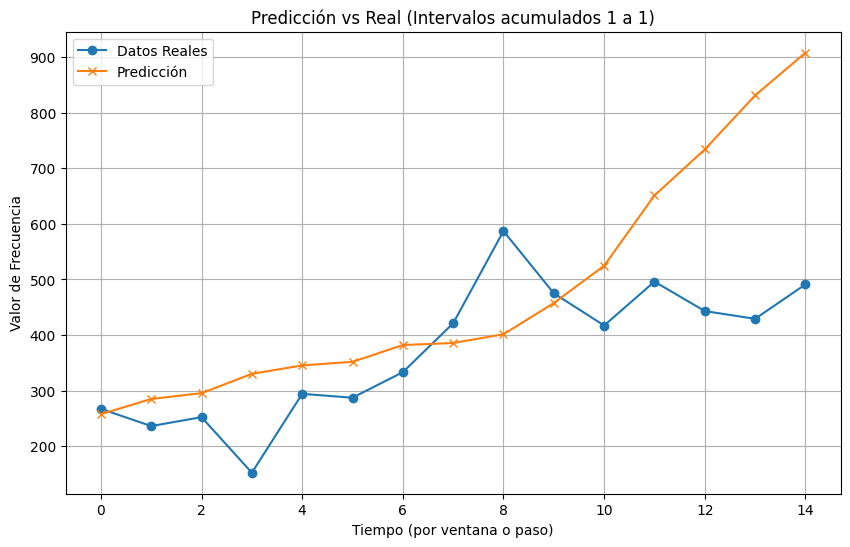

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Acumulando intervalos 1 a 2: MAE = 98.81, MSE = 13173.48


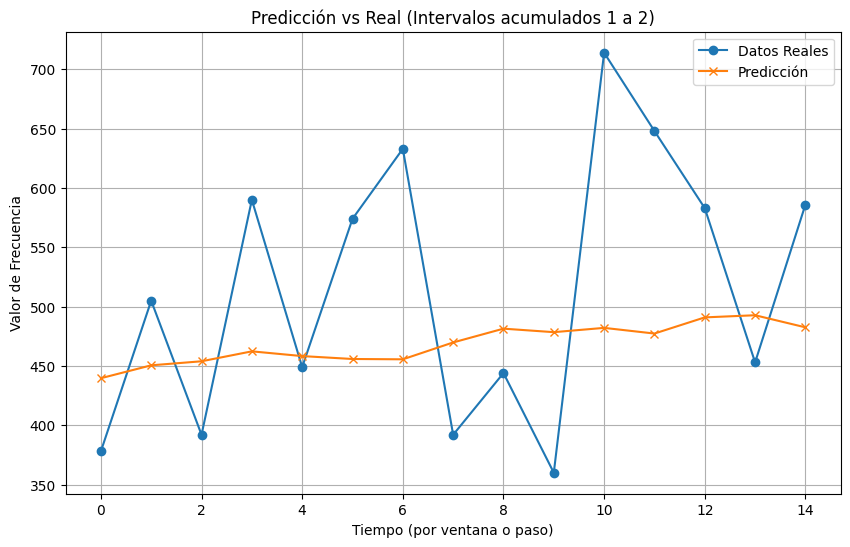

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Acumulando intervalos 1 a 3: MAE = 265.69, MSE = 120316.70


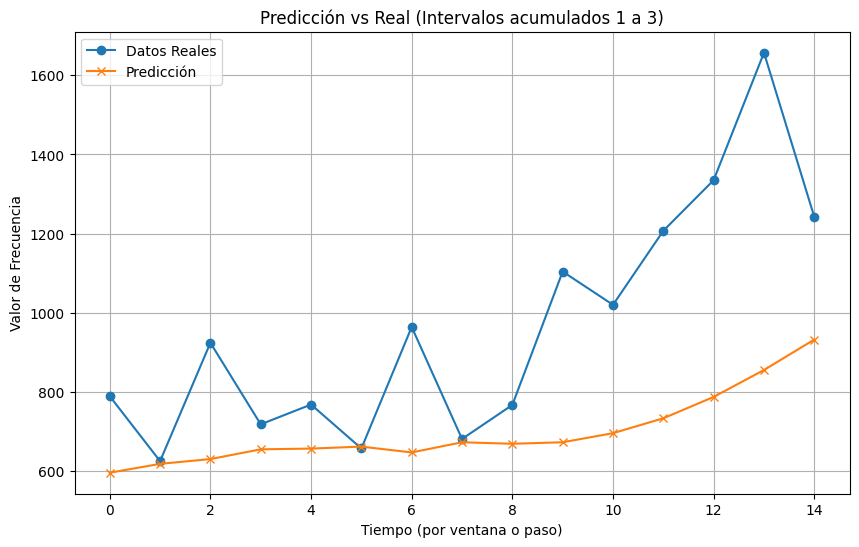

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Acumulando intervalos 1 a 4: MAE = 13.46, MSE = 218.09


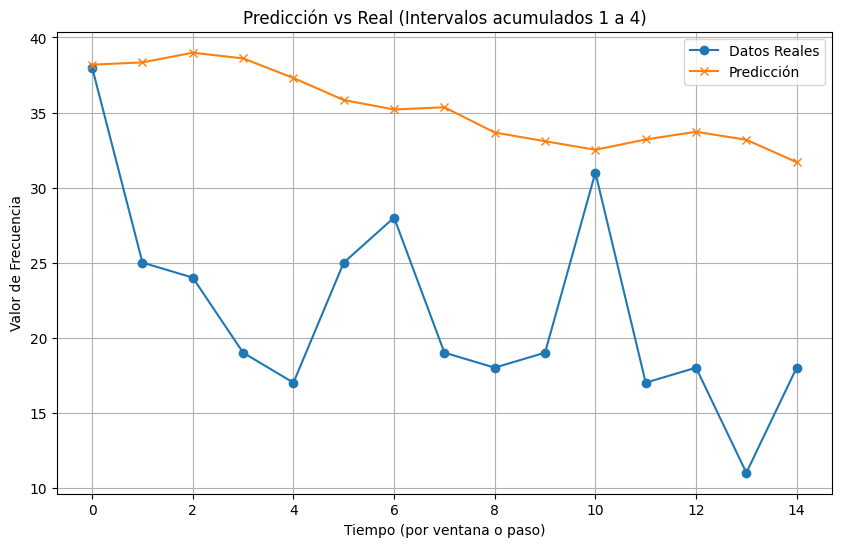

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Acumulando intervalos 1 a 5: MAE = 118.84, MSE = 19506.89


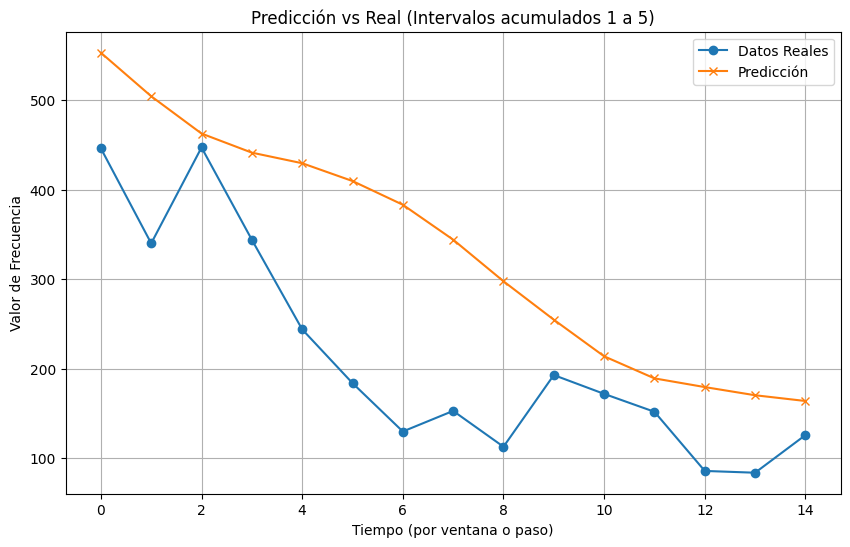

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Acumulando intervalos 1 a 6: MAE = 18.20, MSE = 672.37


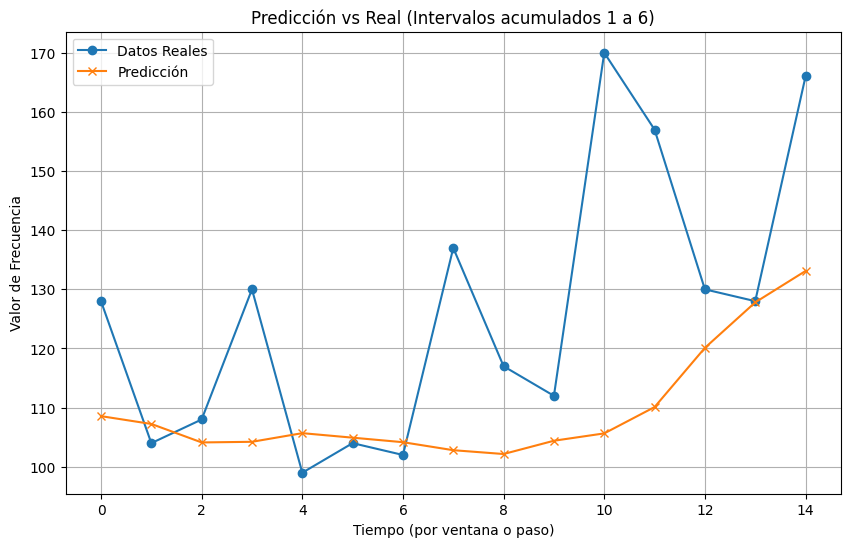

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Acumulando intervalos 1 a 7: MAE = 21.56, MSE = 787.11


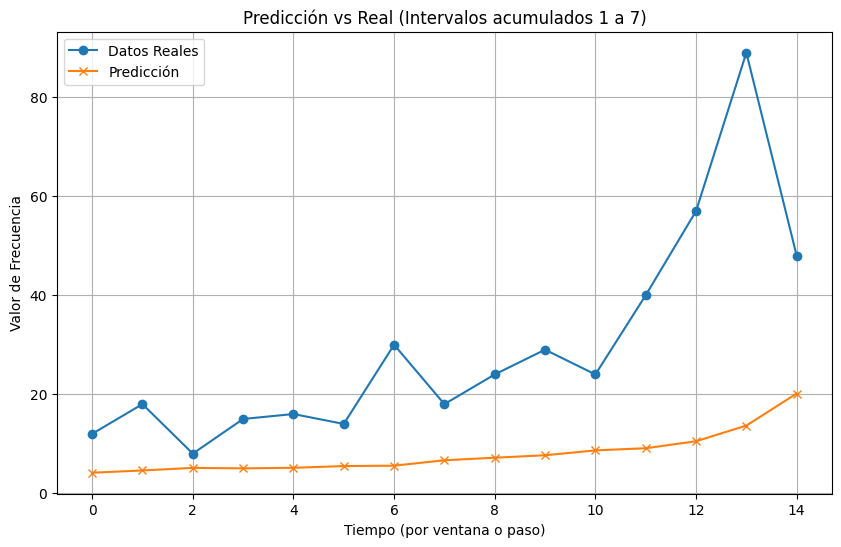

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Acumulando intervalos 1 a 8: MAE = 10.28, MSE = 113.40


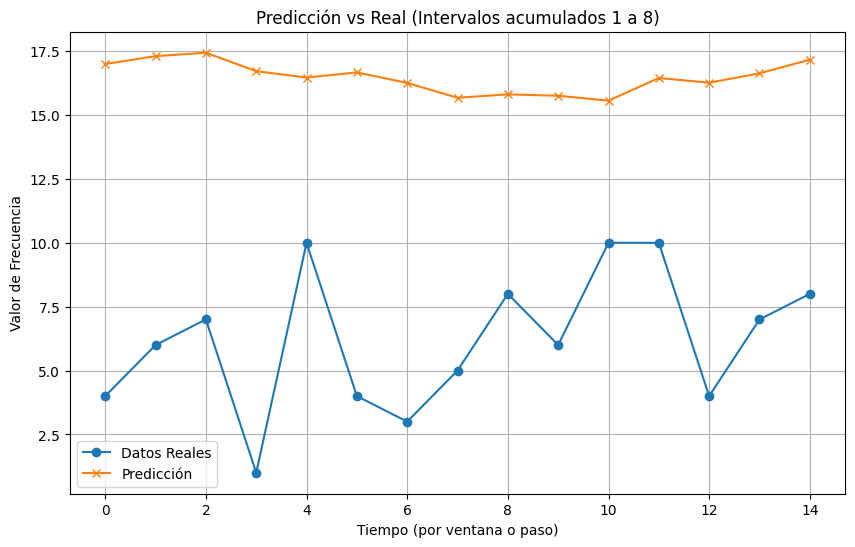


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  137.059725   35813.055372   28.994249
1      Intervalos 1 a 2   98.813068   13173.480206   19.427937
2      Intervalos 1 a 3  265.685872  120316.701522   28.384518
3      Intervalos 1 a 4   13.459221     218.092921   50.134744
4      Intervalos 1 a 5  118.838378   19506.889712   48.055877
5      Intervalos 1 a 6   18.198282     672.365458   14.375691
6      Intervalos 1 a 7   21.556710     787.111525  105.960527
7      Intervalos 1 a 8   10.278951     113.401167   94.609504


In [35]:
# Parameters
WINDOW_SIZE = 7
HORIZONTE = 15 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/lstm_7_15.csv', index=False)

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Acumulando intervalos 1 a 1: MAE = 53.57, MSE = 6115.01


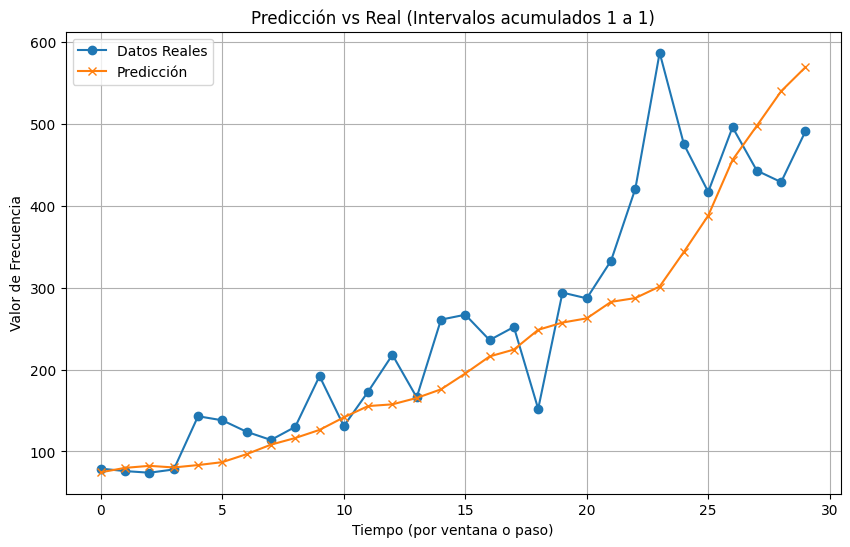

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Acumulando intervalos 1 a 2: MAE = 79.96, MSE = 9806.46


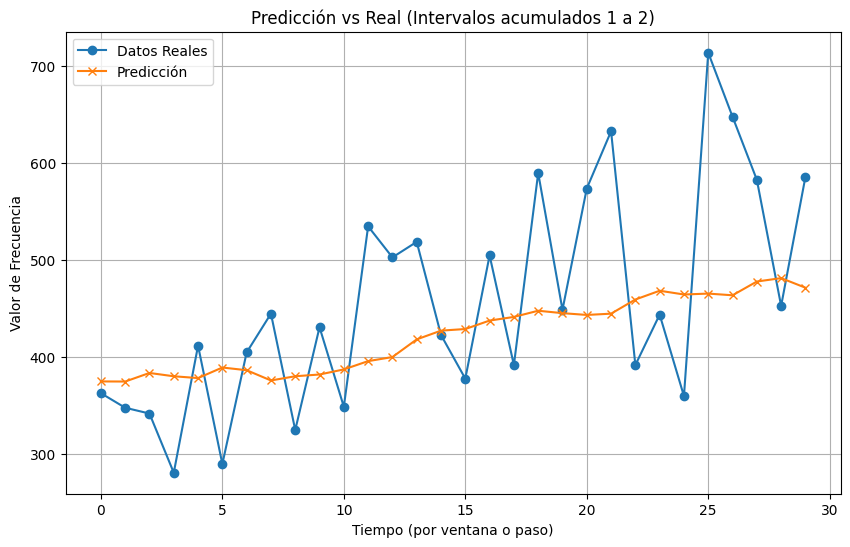

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Acumulando intervalos 1 a 3: MAE = 215.60, MSE = 82027.88


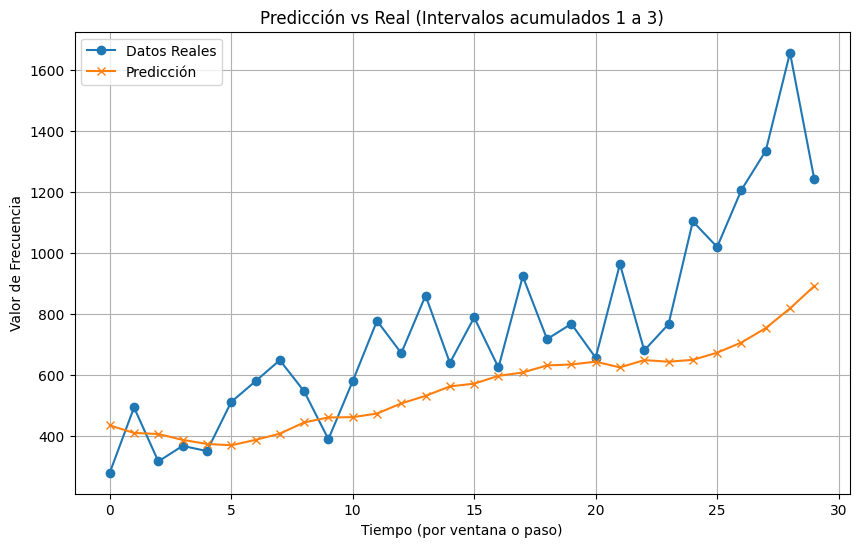

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Acumulando intervalos 1 a 4: MAE = 26.06, MSE = 711.35


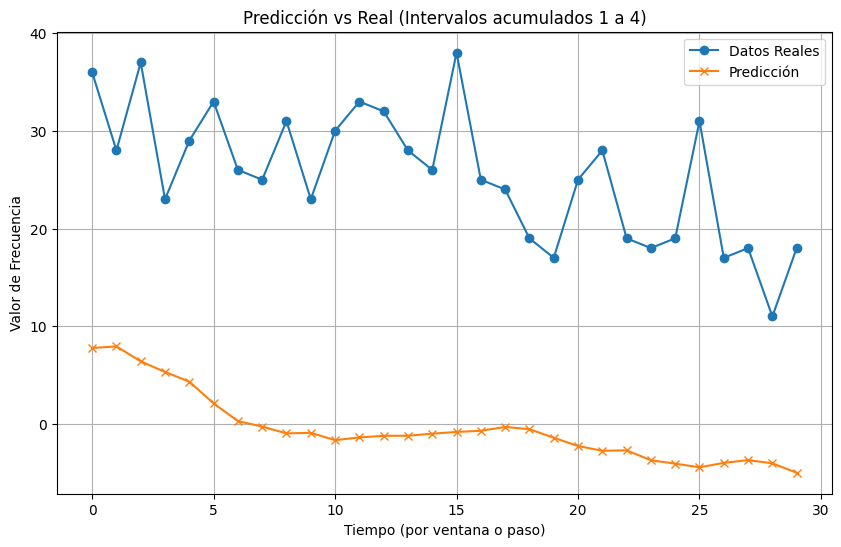

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Acumulando intervalos 1 a 5: MAE = 147.45, MSE = 34448.09


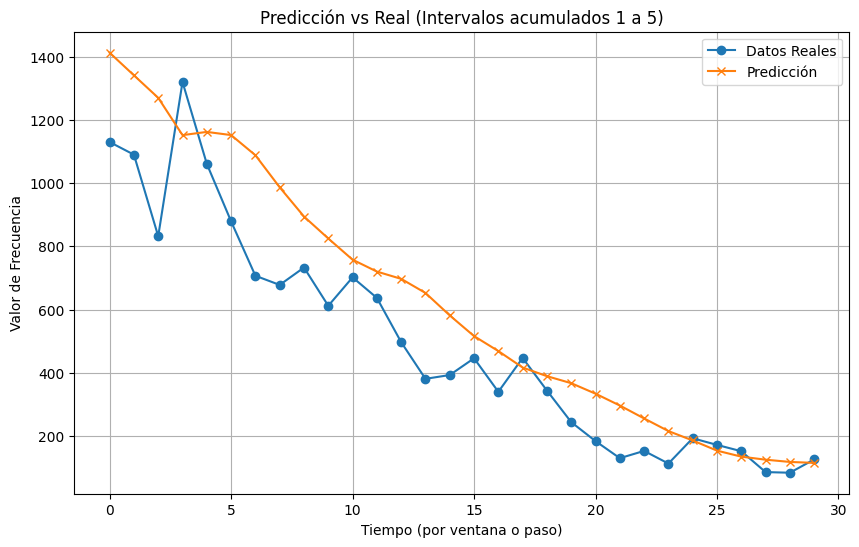

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Acumulando intervalos 1 a 6: MAE = 16.60, MSE = 480.02


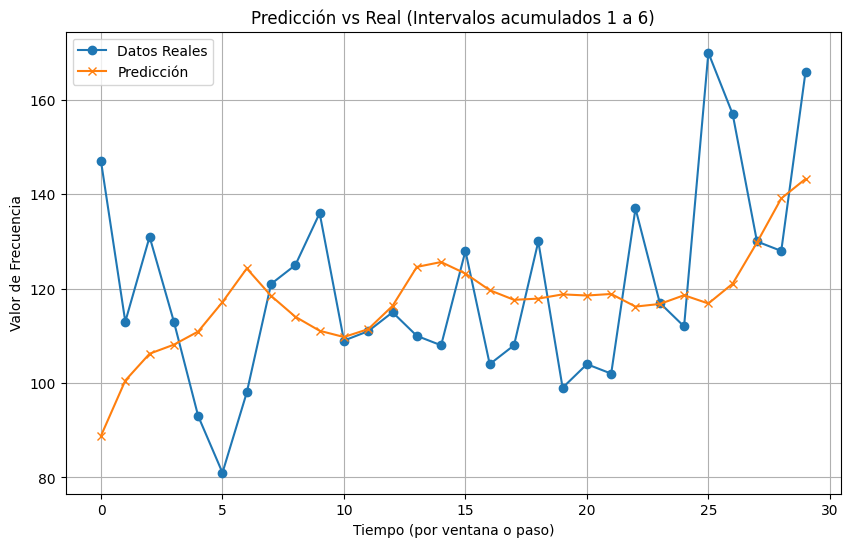

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Acumulando intervalos 1 a 7: MAE = 18.59, MSE = 412.05


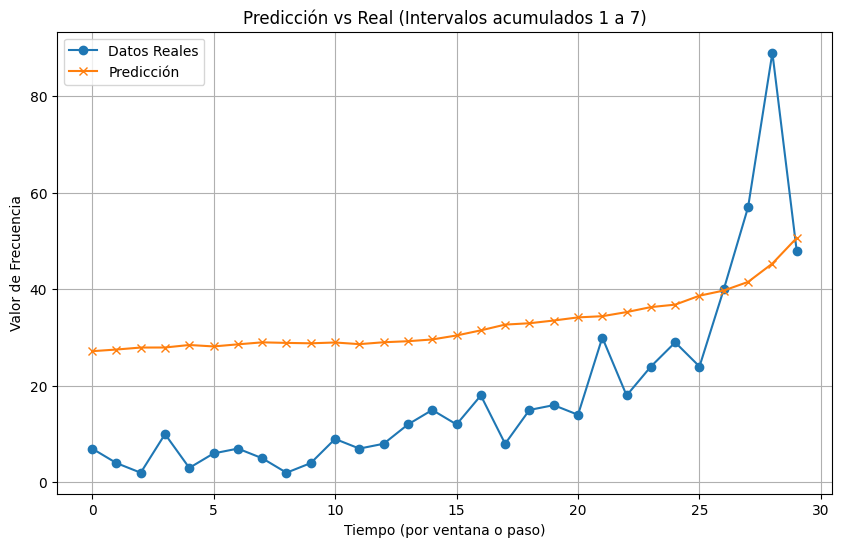

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
Acumulando intervalos 1 a 8: MAE = 4.56, MSE = 28.14


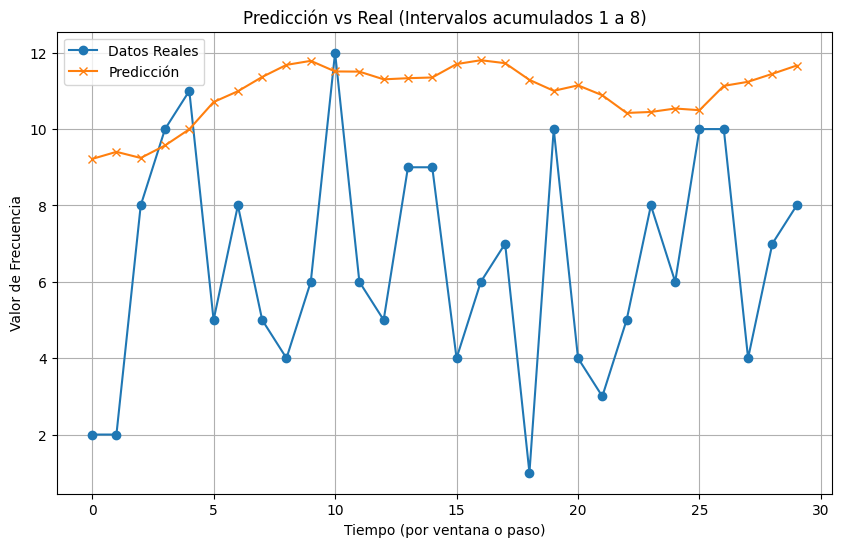


Resumen de métricas:
  Intervalos Acumulados         MAE           MSE       SMAPE
0      Intervalos 1 a 1   53.570642   6115.005759   21.073901
1      Intervalos 1 a 2   79.957720   9806.456742   17.385996
2      Intervalos 1 a 3  215.595146  82027.876971   29.649534
3      Intervalos 1 a 4   26.064021    711.354121  187.538584
4      Intervalos 1 a 5  147.447706  34448.085068   28.981870
5      Intervalos 1 a 6   16.602945    480.023747   13.880737
6      Intervalos 1 a 7   18.591768    412.052081   89.614685
7      Intervalos 1 a 8    4.558604     28.135290   58.962324


In [36]:
# Parameters
WINDOW_SIZE = 7 
HORIZONTE = 30 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/lstm_7_30.csv', index=False)

### Train for windows size = 14

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Acumulando intervalos 1 a 1: MAE = 63.39, MSE = 7687.78


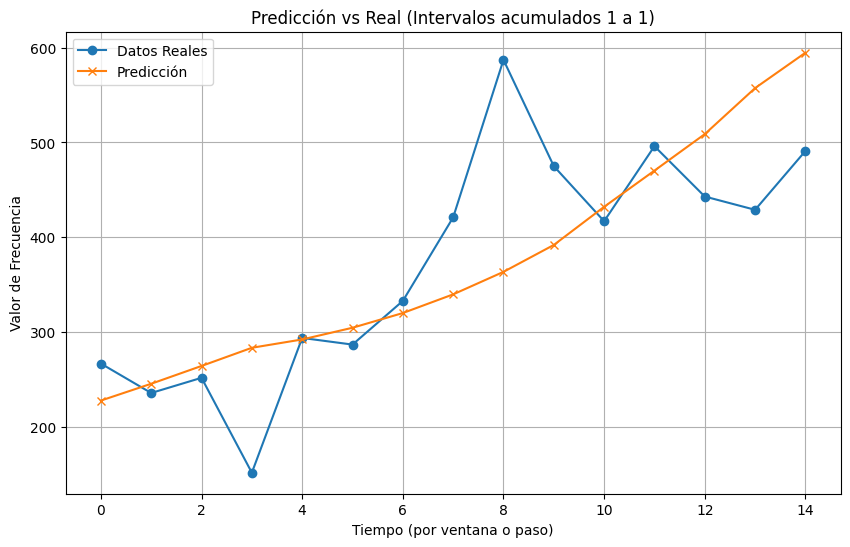

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Acumulando intervalos 1 a 2: MAE = 103.82, MSE = 16553.57


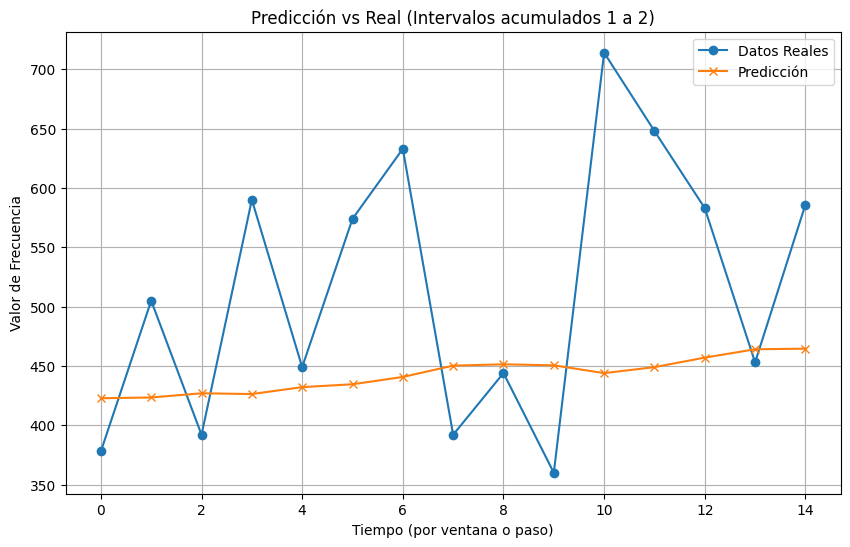

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
Acumulando intervalos 1 a 3: MAE = 263.16, MSE = 117025.21


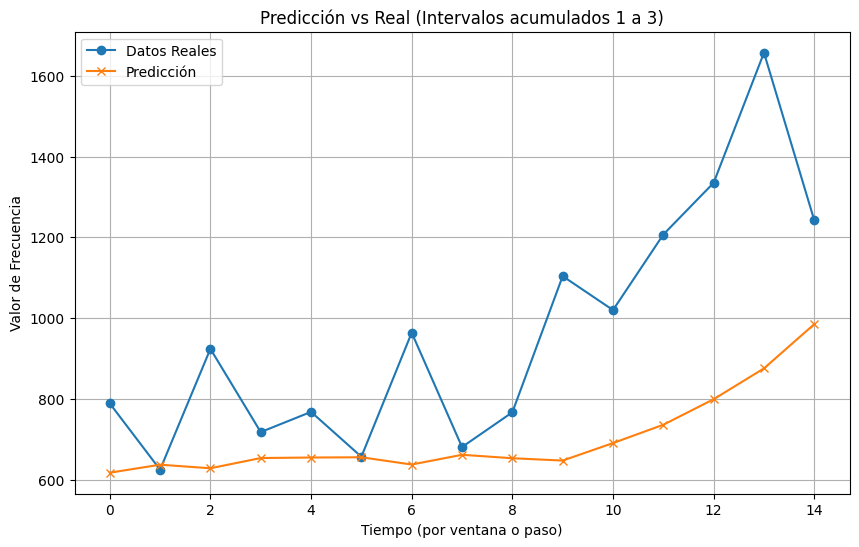

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Acumulando intervalos 1 a 4: MAE = 6.92, MSE = 80.18


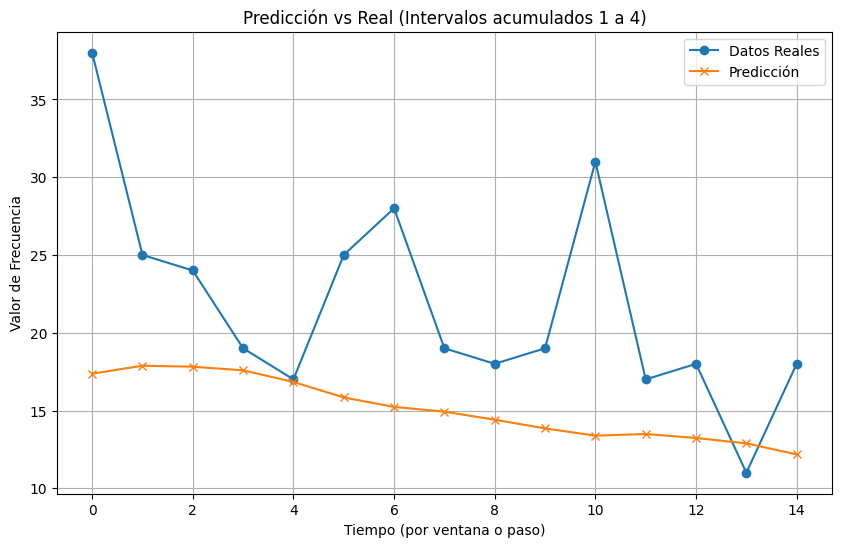

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Acumulando intervalos 1 a 5: MAE = 53.62, MSE = 4154.49


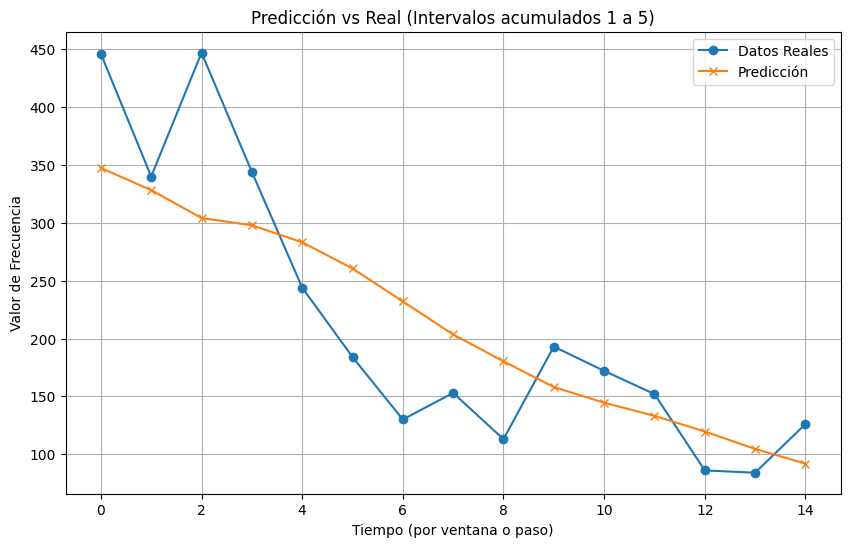

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Acumulando intervalos 1 a 6: MAE = 16.98, MSE = 417.32


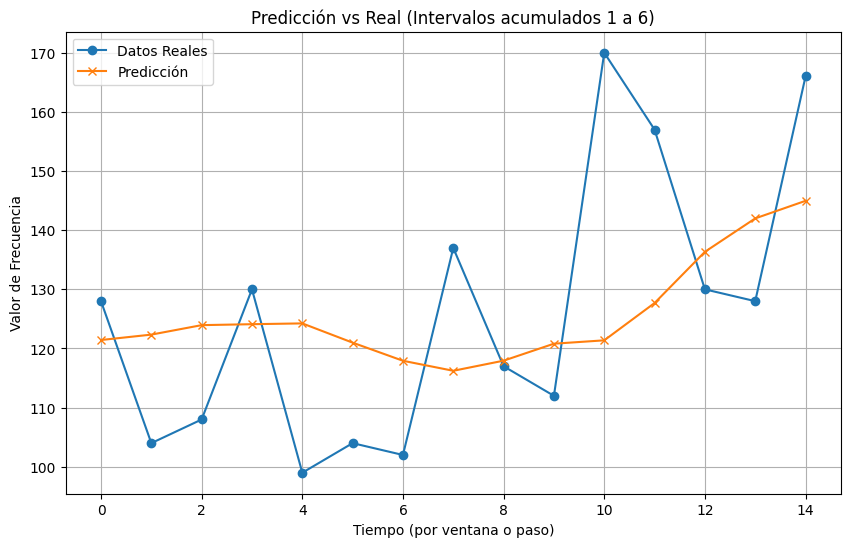

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Acumulando intervalos 1 a 7: MAE = 14.25, MSE = 320.24


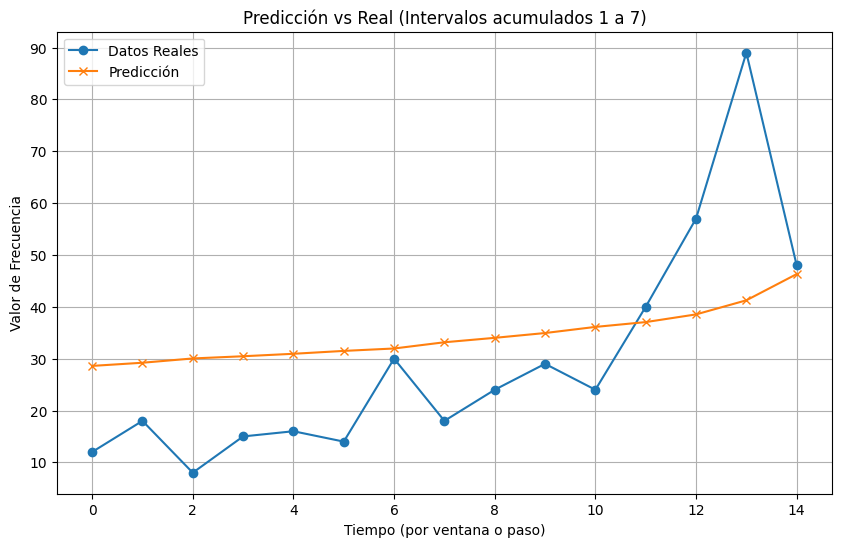

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Acumulando intervalos 1 a 8: MAE = 20.64, MSE = 433.26


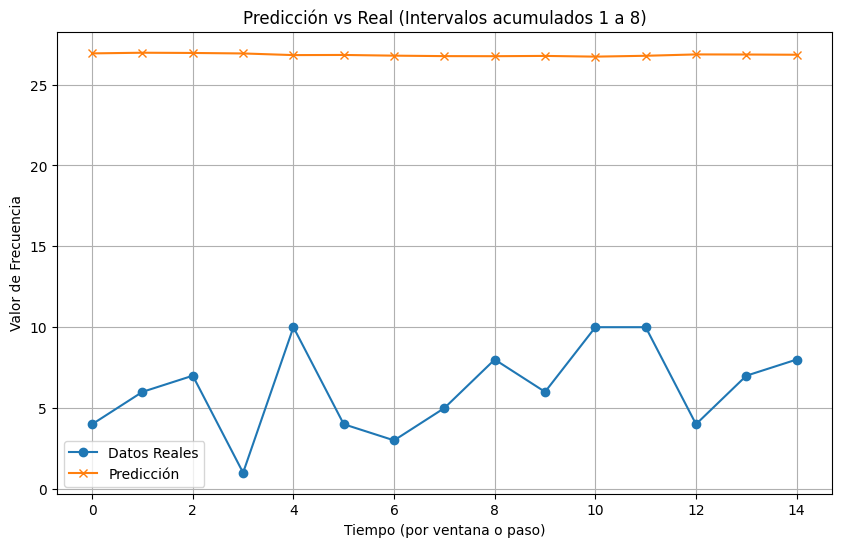


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1   63.385491    7687.777040   16.716748
1      Intervalos 1 a 2  103.818899   16553.567619   20.486859
2      Intervalos 1 a 3  263.162195  117025.211666   28.233642
3      Intervalos 1 a 4    6.924997      80.181503   34.324984
4      Intervalos 1 a 5   53.623151    4154.492807   26.462351
5      Intervalos 1 a 6   16.982417     417.317006   13.297392
6      Intervalos 1 a 7   14.252785     320.242013   49.063209
7      Intervalos 1 a 8   20.643033     433.257486  127.046611


In [37]:
# Parameters
WINDOW_SIZE = 14 
HORIZONTE = 15 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/lstm_14_15.csv', index=False)

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Acumulando intervalos 1 a 1: MAE = 44.23, MSE = 4383.23


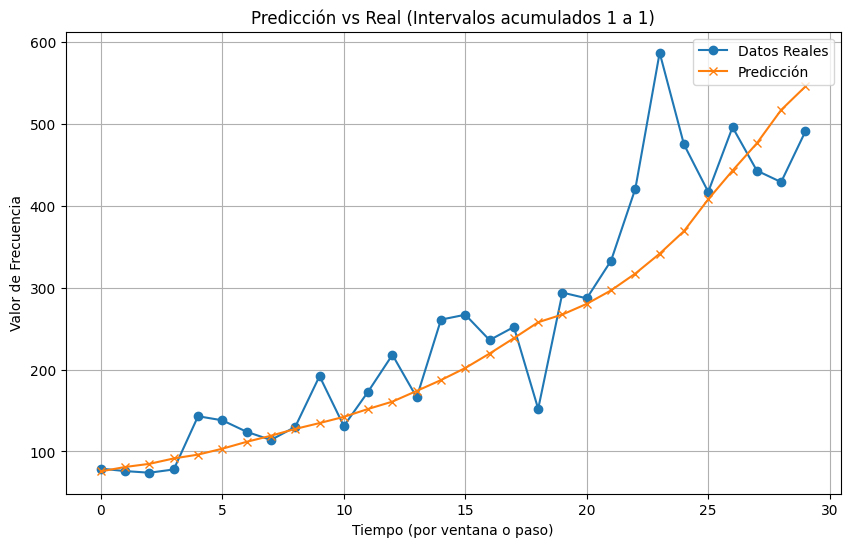

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Acumulando intervalos 1 a 2: MAE = 91.75, MSE = 15033.82


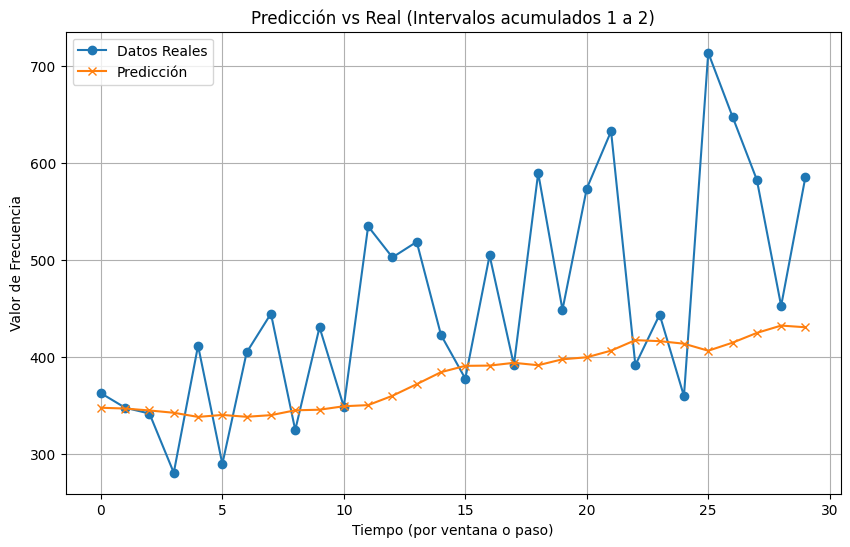

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Acumulando intervalos 1 a 3: MAE = 187.92, MSE = 64077.22


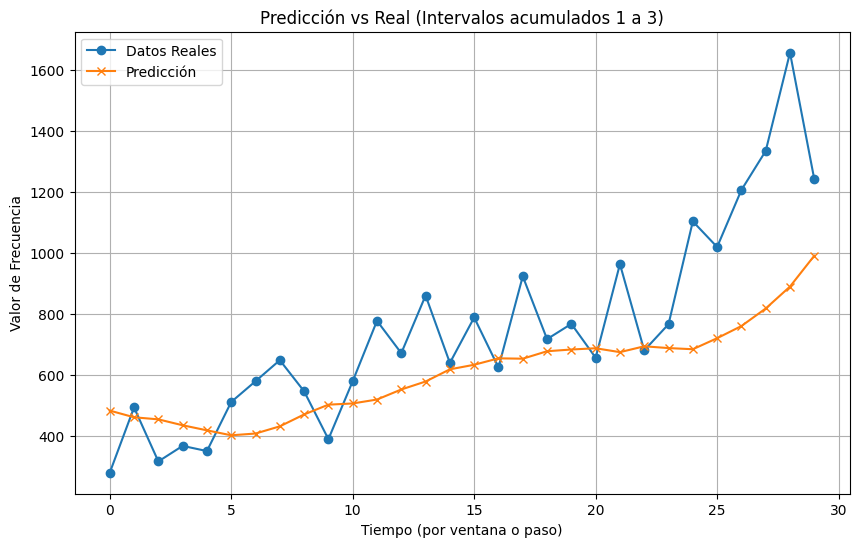

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Acumulando intervalos 1 a 4: MAE = 13.65, MSE = 217.06


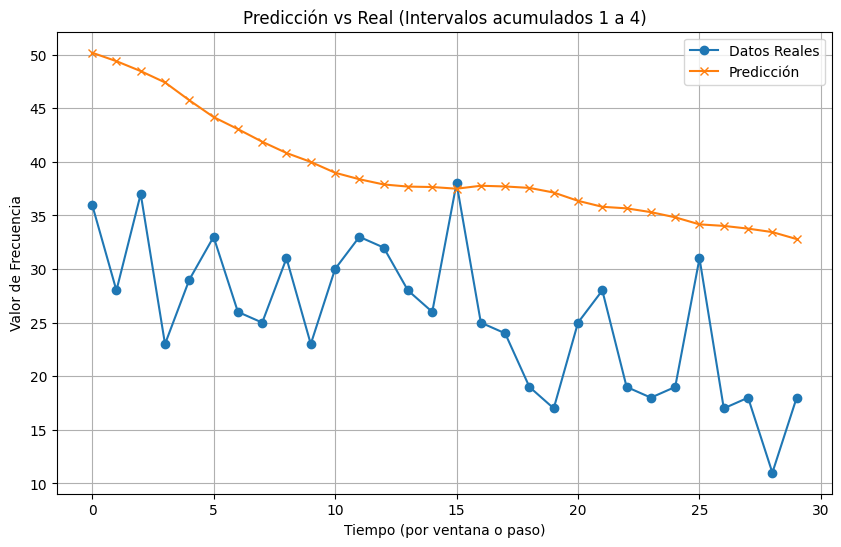

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Acumulando intervalos 1 a 5: MAE = 162.56, MSE = 40664.95


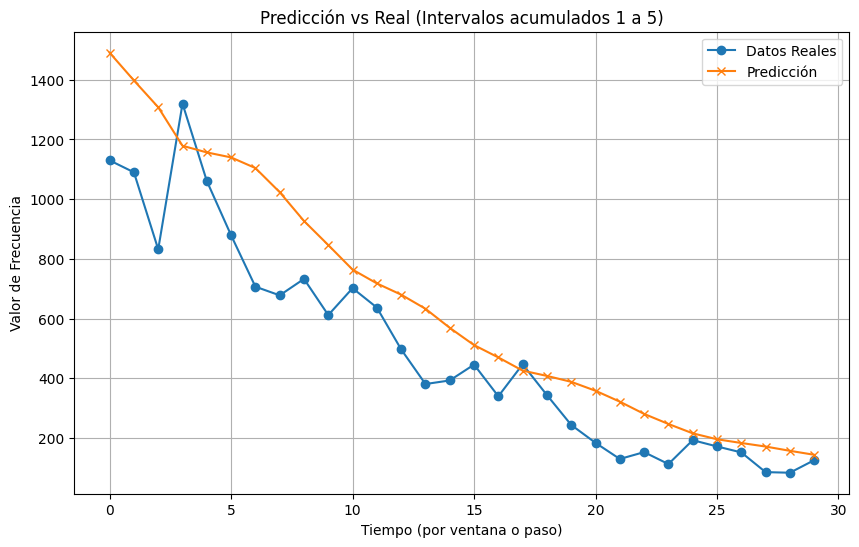

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Acumulando intervalos 1 a 6: MAE = 16.54, MSE = 510.99


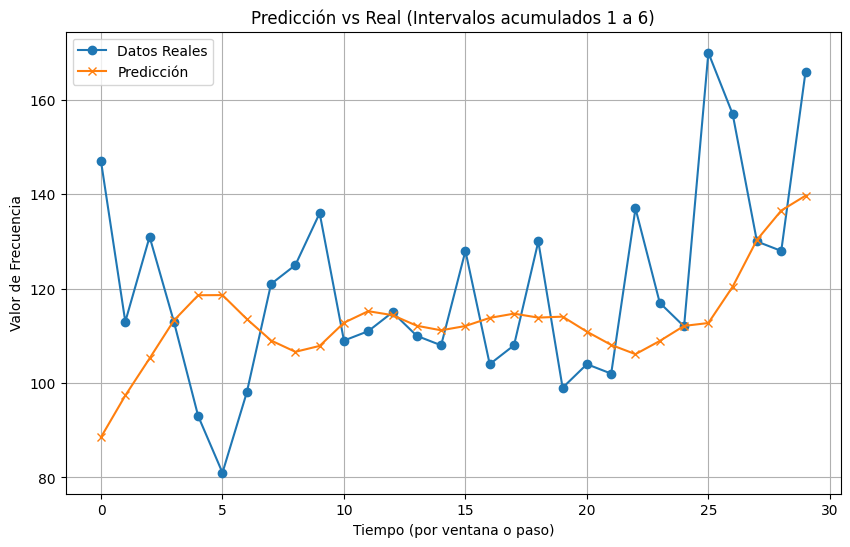

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Acumulando intervalos 1 a 7: MAE = 24.17, MSE = 680.08


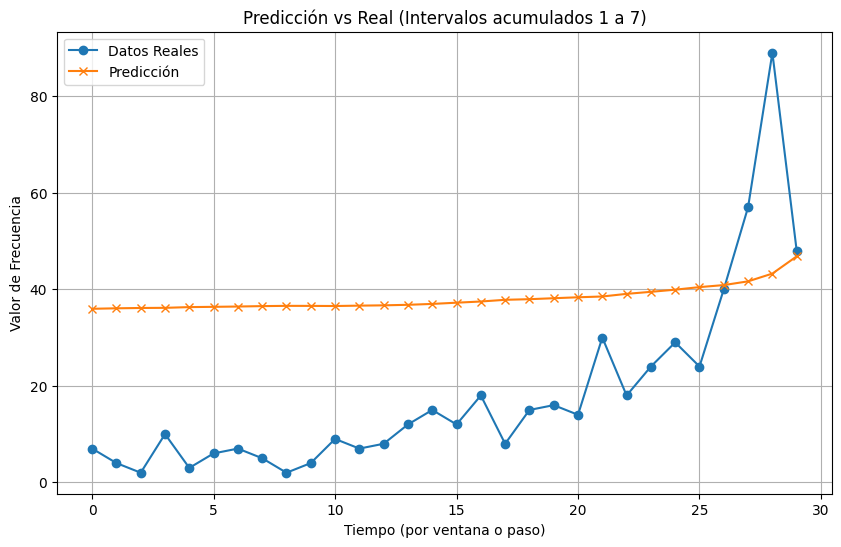

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Acumulando intervalos 1 a 8: MAE = 50.62, MSE = 2570.26


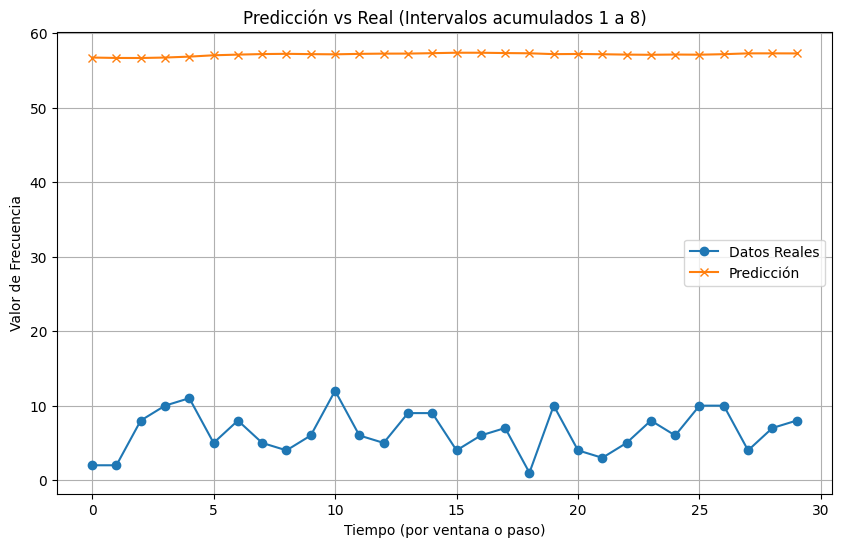


Resumen de métricas:
  Intervalos Acumulados         MAE           MSE       SMAPE
0      Intervalos 1 a 1   44.226255   4383.227878   17.355785
1      Intervalos 1 a 2   91.750716  15033.824485   20.105861
2      Intervalos 1 a 3  187.923692  64077.221418   25.736964
3      Intervalos 1 a 4   13.646730    217.060127   44.411005
4      Intervalos 1 a 5  162.561817  40664.953087   33.342295
5      Intervalos 1 a 6   16.537091    510.993457   13.880152
6      Intervalos 1 a 7   24.169355    680.083499   99.927705
7      Intervalos 1 a 8   50.618000   2570.255626  159.841337


In [38]:
# Parameters
WINDOW_SIZE = 14 
HORIZONTE = 30 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/lstm_14_30.csv', index=False)

### Train for windows size = 21


c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Acumulando intervalos 1 a 1: MAE = 86.96, MSE = 13861.79


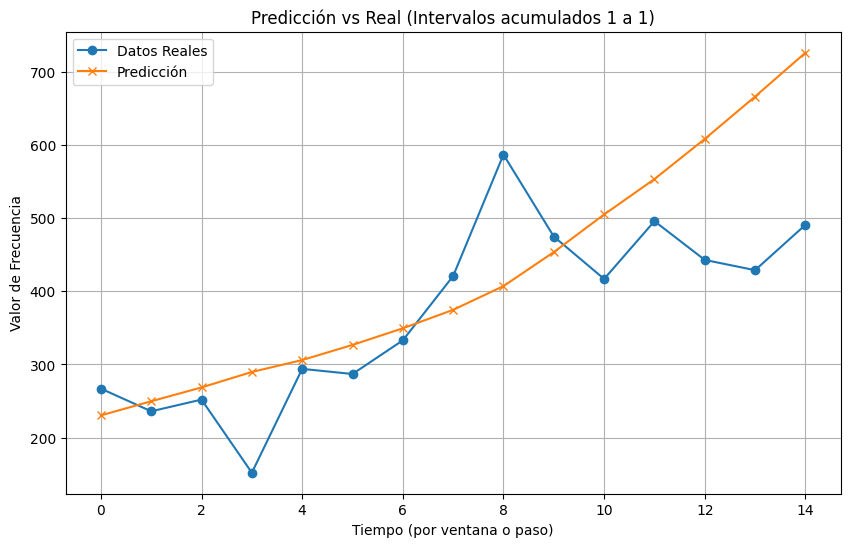

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Acumulando intervalos 1 a 2: MAE = 116.41, MSE = 22308.73


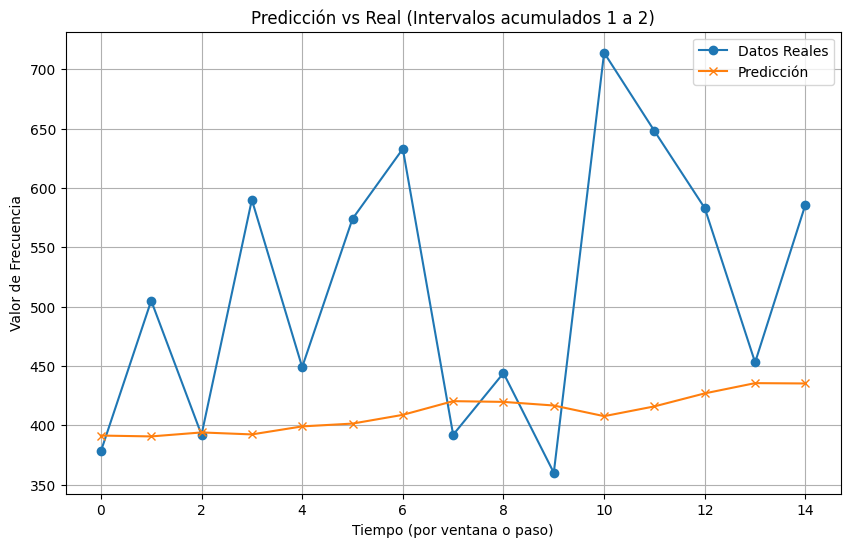

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Acumulando intervalos 1 a 3: MAE = 273.11, MSE = 126224.40


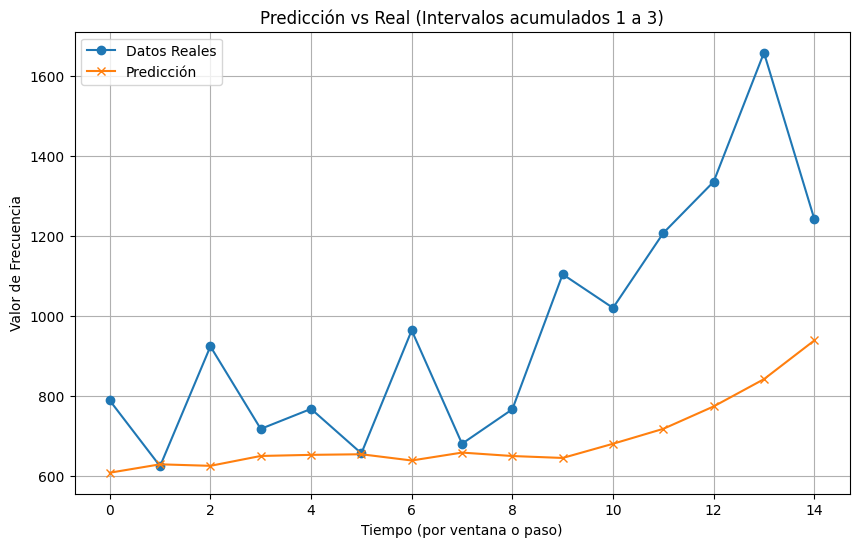

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Acumulando intervalos 1 a 4: MAE = 6.04, MSE = 47.00


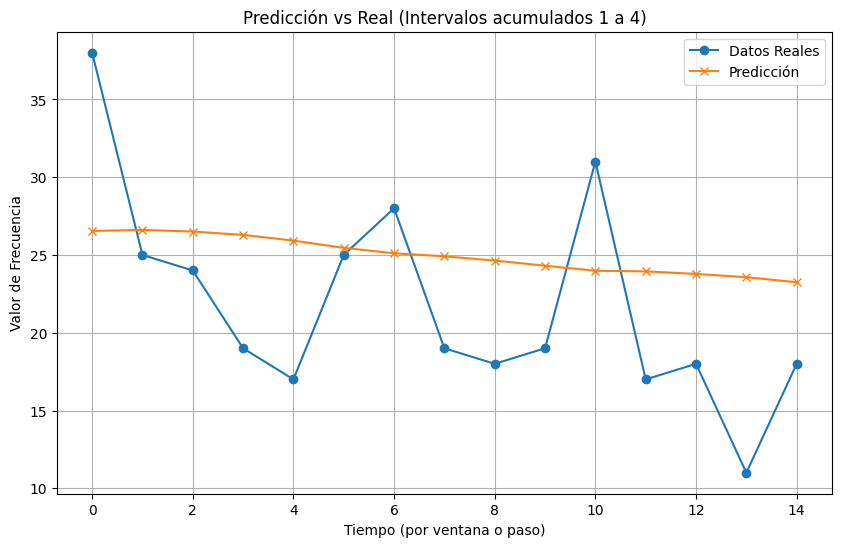

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Acumulando intervalos 1 a 5: MAE = 53.19, MSE = 3996.85


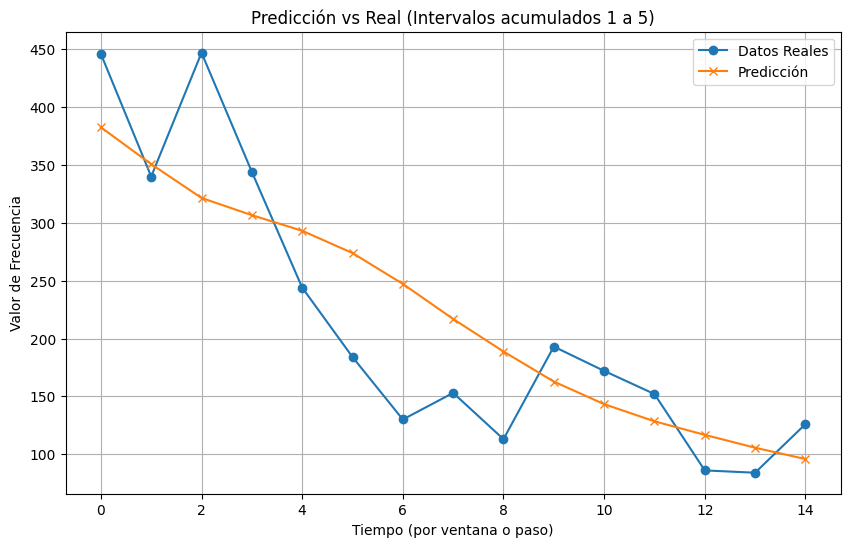

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Acumulando intervalos 1 a 6: MAE = 49.24, MSE = 2834.74


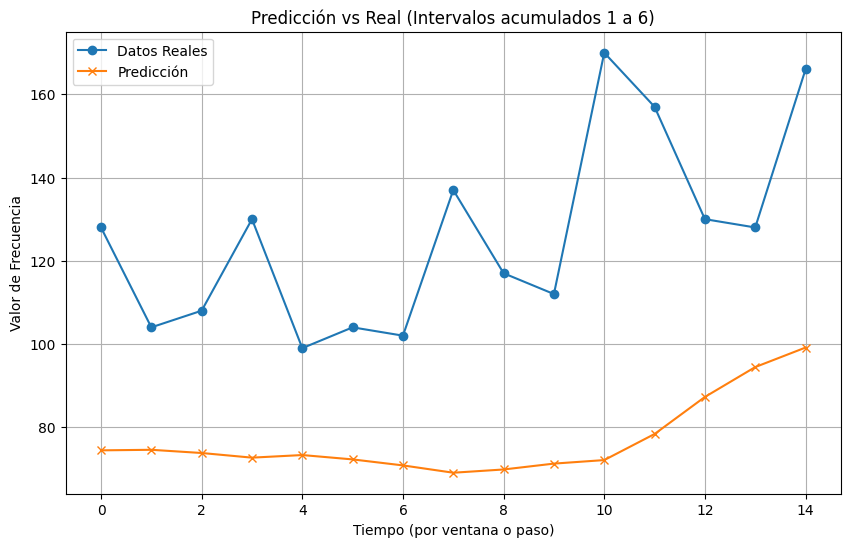

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Acumulando intervalos 1 a 7: MAE = 13.23, MSE = 472.24


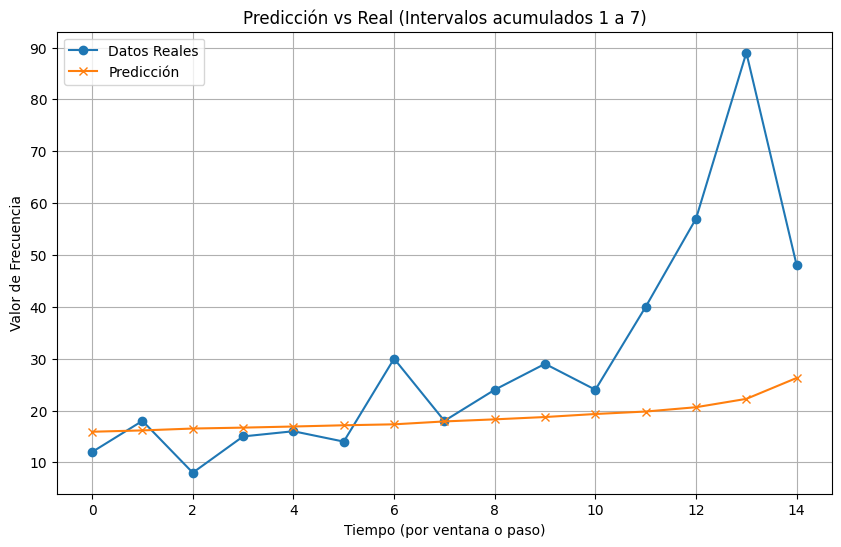

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Acumulando intervalos 1 a 8: MAE = 10.35, MSE = 114.90


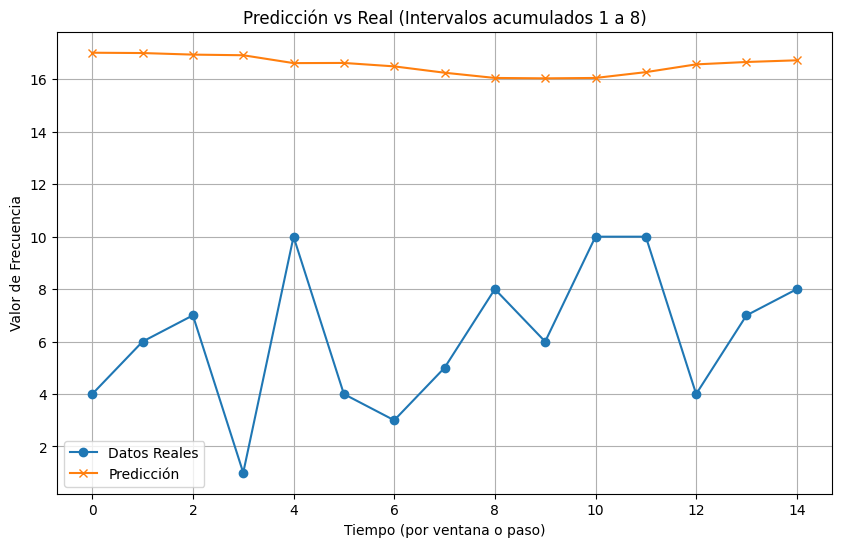


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE      SMAPE
0      Intervalos 1 a 1   86.961145   13861.791150  20.461552
1      Intervalos 1 a 2  116.414707   22308.726799  23.319860
2      Intervalos 1 a 3  273.108940  126224.400952  29.396235
3      Intervalos 1 a 4    6.036010      46.998729  27.063151
4      Intervalos 1 a 5   53.193361    3996.846814  26.622346
5      Intervalos 1 a 6   49.244206    2834.739483  47.368574
6      Intervalos 1 a 7   13.231990     472.240529  42.008538
7      Intervalos 1 a 8   10.349017     114.901921  94.896765


In [39]:
# Parameters
WINDOW_SIZE = 21 
HORIZONTE = 15 
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/lstm_21_15.csv', index=False)

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Acumulando intervalos 1 a 1: MAE = 43.10, MSE = 4339.46


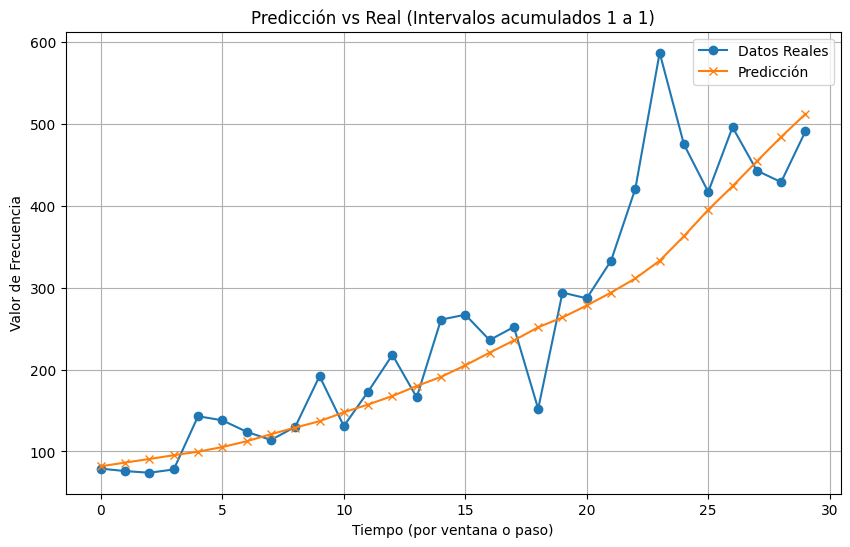

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
Acumulando intervalos 1 a 2: MAE = 86.43, MSE = 12697.87


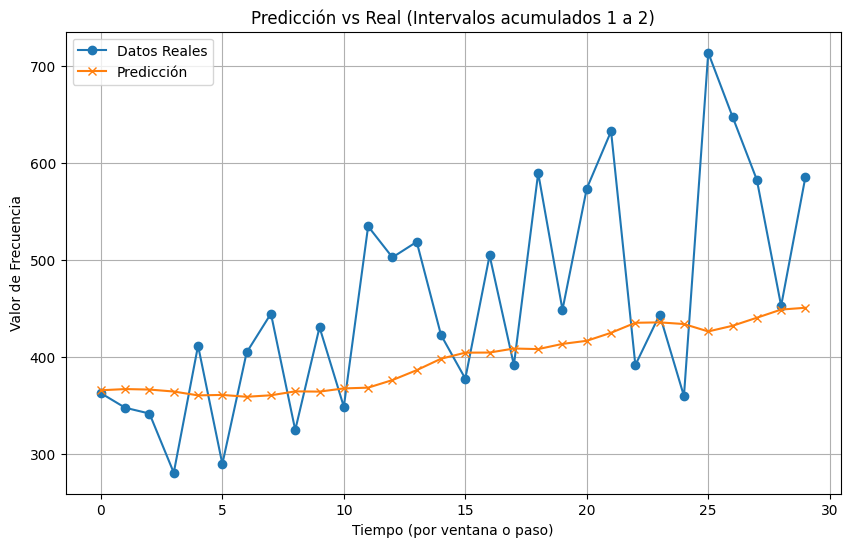

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
Acumulando intervalos 1 a 3: MAE = 202.43, MSE = 75768.30


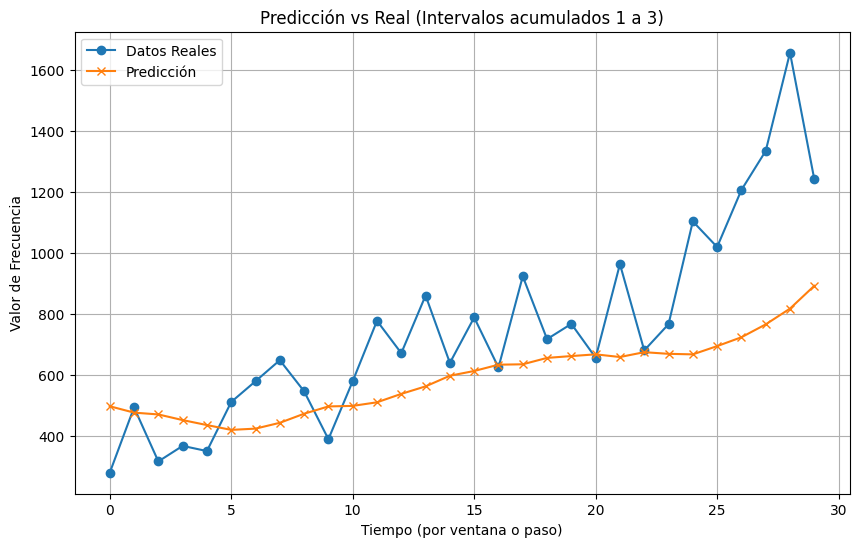

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
Acumulando intervalos 1 a 4: MAE = 4.60, MSE = 34.98


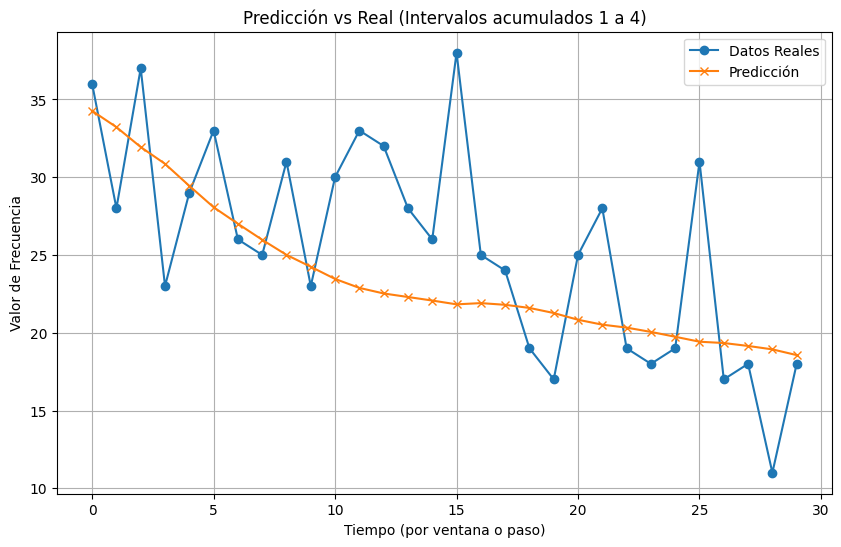

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Acumulando intervalos 1 a 5: MAE = 110.20, MSE = 21560.43


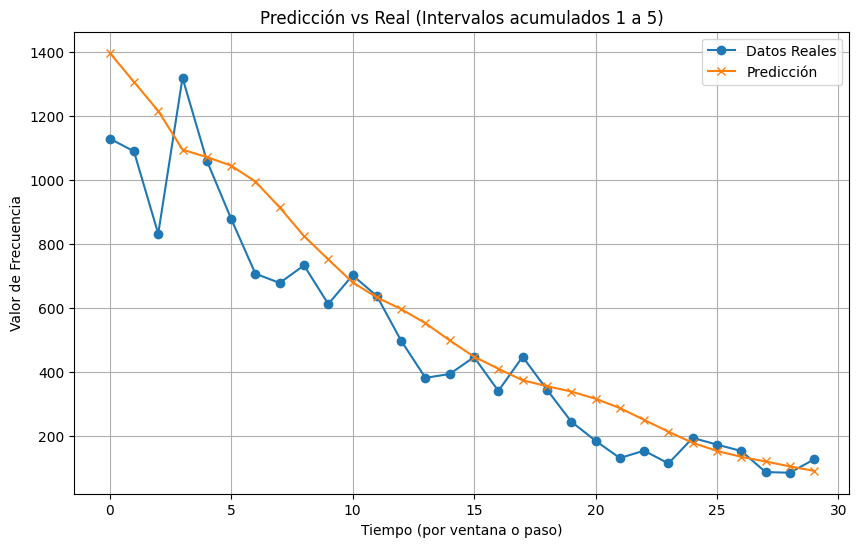

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Acumulando intervalos 1 a 6: MAE = 17.26, MSE = 442.63


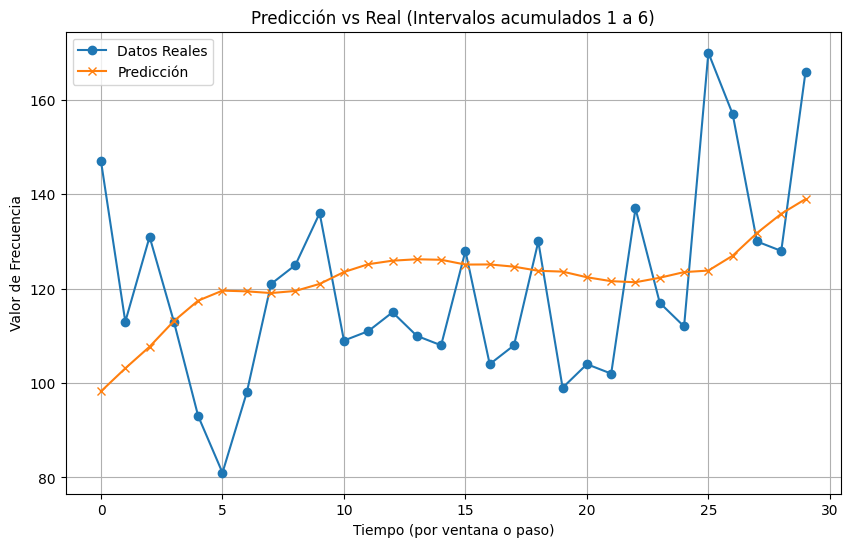

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Acumulando intervalos 1 a 7: MAE = 13.03, MSE = 252.55


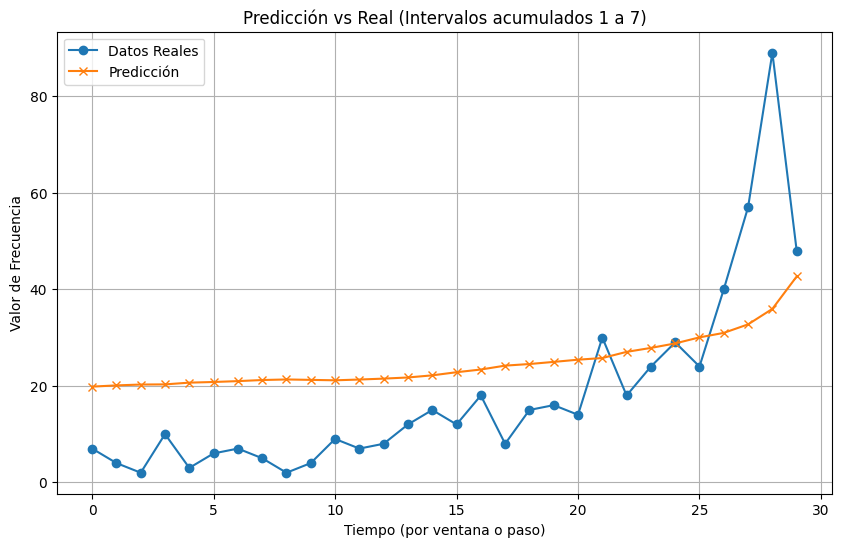

c:\Users\criju\.conda\envs\ts\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Acumulando intervalos 1 a 8: MAE = 2.60, MSE = 9.60


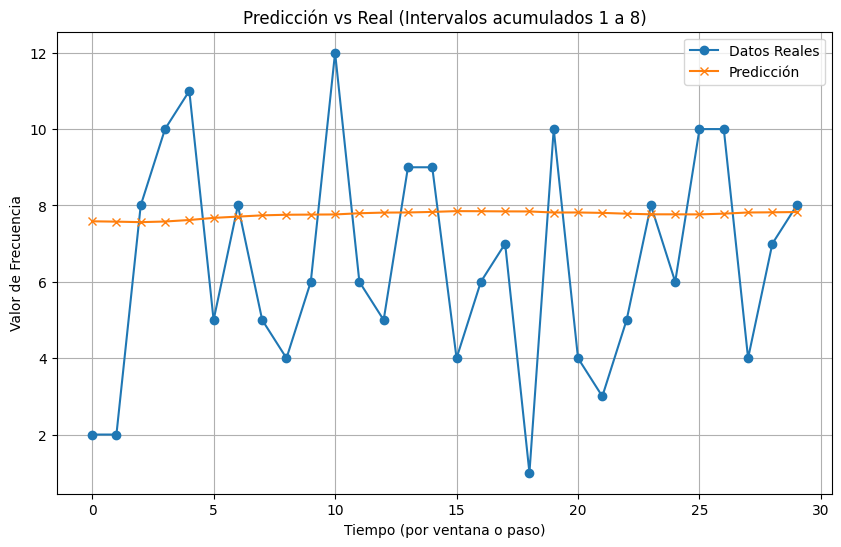


Resumen de métricas:
  Intervalos Acumulados         MAE           MSE      SMAPE
0      Intervalos 1 a 1   43.102953   4339.460398  17.436183
1      Intervalos 1 a 2   86.426557  12697.866661  18.863253
2      Intervalos 1 a 3  202.429561  75768.296617  27.576931
3      Intervalos 1 a 4    4.596665     34.983185  18.523575
4      Intervalos 1 a 5  110.196663  21560.425482  24.046221
5      Intervalos 1 a 6   17.259767    442.630528  14.344292
6      Intervalos 1 a 7   13.028915    252.550077  74.145615
7      Intervalos 1 a 8    2.601856      9.595578  41.921557


In [40]:
# Parameters
WINDOW_SIZE = 21 
HORIZONTE = 30
EPOCHS = 50          
BATCH_SIZE = 16     

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]
    df_train = df[df['Intervalo'].isin(intervalos_incluir)]
    

    df_train = df_train.sort_values(by='Fecha')
    
    series = df_train['Frecuencia'].values.reshape(-1, 1)
    
    # Escalamos los datos
    series_scaled = scaler.fit_transform(series)
    
    # Recordar que para generar las ventanas se requieren window_size datos previos
    if len(series_scaled) <= WINDOW_SIZE + HORIZONTE:
        print(f"Iteración {i+1}: No hay suficientes datos para formar las ventanas (se requiere al menos {WINDOW_SIZE+HORIZONTE} datos)")
        continue
    
    train_data = series_scaled[:-HORIZONTE]
    test_data = series_scaled[-(HORIZONTE + WINDOW_SIZE):]  # Incluye la ventana previa para test
    
    # Generamos las secuencias (ventanas)
    x_train, y_train = create_windows(train_data, WINDOW_SIZE)
    x_test, y_test = create_windows(test_data, WINDOW_SIZE)
    
    # Reshape para que coincida con la entrada de LSTM: (muestras, window_size, 1)
    x_train = x_train.reshape(-1, WINDOW_SIZE, 1)
    x_test = x_test.reshape(-1, WINDOW_SIZE, 1)
    
    # Construimos y entrenamos el modelo
    model = build_lstm_model(WINDOW_SIZE)
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    
    # Hacemos la predicción para el conjunto test
    y_pred_scaled = model.predict(x_test)
    
    # Invertimos la transformación del escalador para volver a los valores originales
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    # Calculamos las métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    smape_value = smape(y_test_inv, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos reales vs predicción para este intervalo
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Datos Reales", marker='o')
    plt.plot(y_pred, label="Predicción", marker='x')
    plt.title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    plt.xlabel("Tiempo (por ventana o paso)")
    plt.ylabel("Valor de Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/lstm_21_30.csv', index=False)

## TimesFM

In [24]:
import pandas as pd
import timesfm
import os
from huggingface_hub import login
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dotenv import load_dotenv


load_dotenv()
hf_token = os.getenv("HUGGINGFACE_API_KEY")
# Log in with the token
login(token=hf_token)


Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 5117.50it/s]


Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 1: MAE = 161.83, MSE = 39464.28


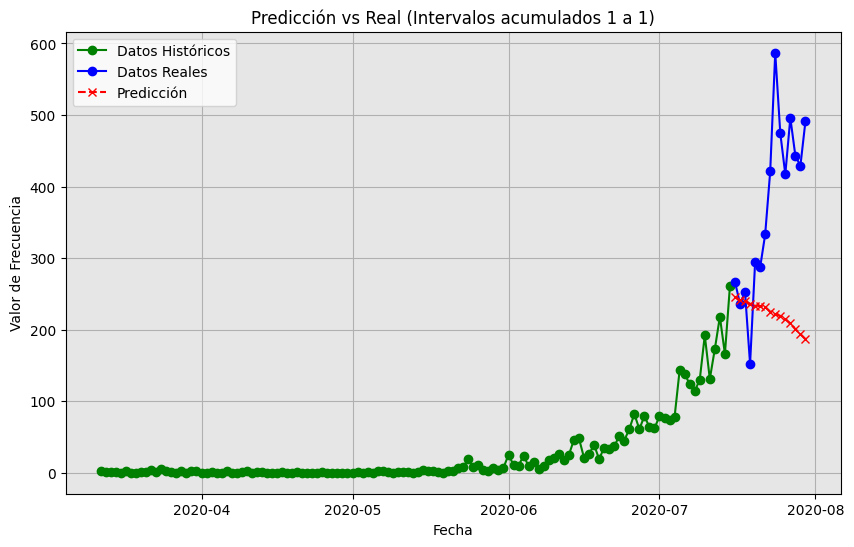

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 2: MAE = 182.36, MSE = 49539.47


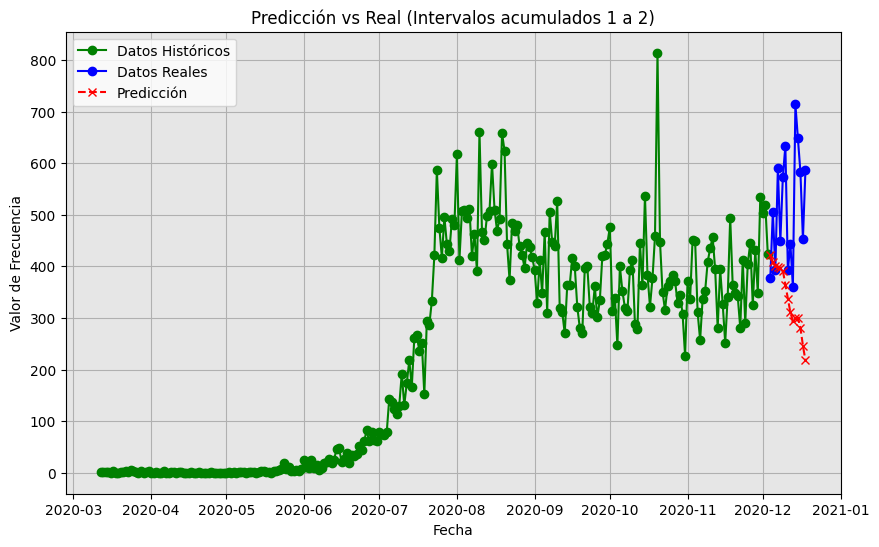

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 3: MAE = 325.83, MSE = 181618.79


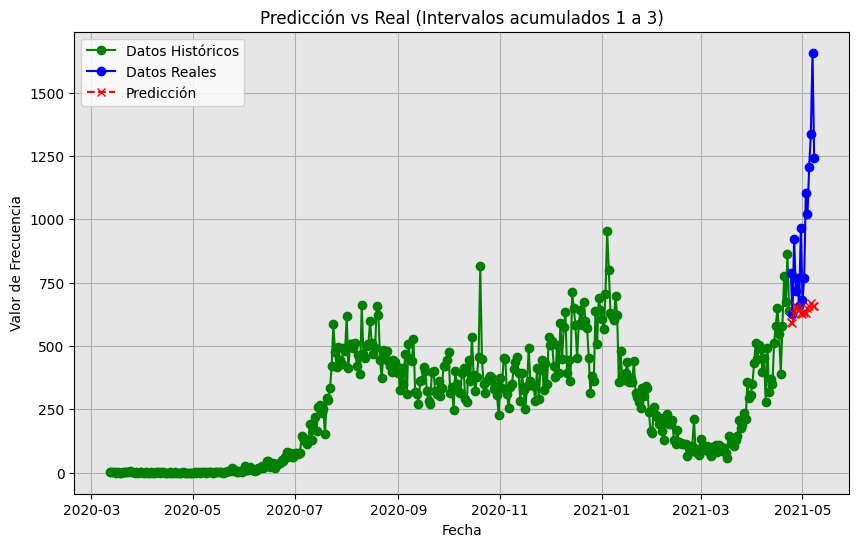

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 4: MAE = 24.57, MSE = 638.38


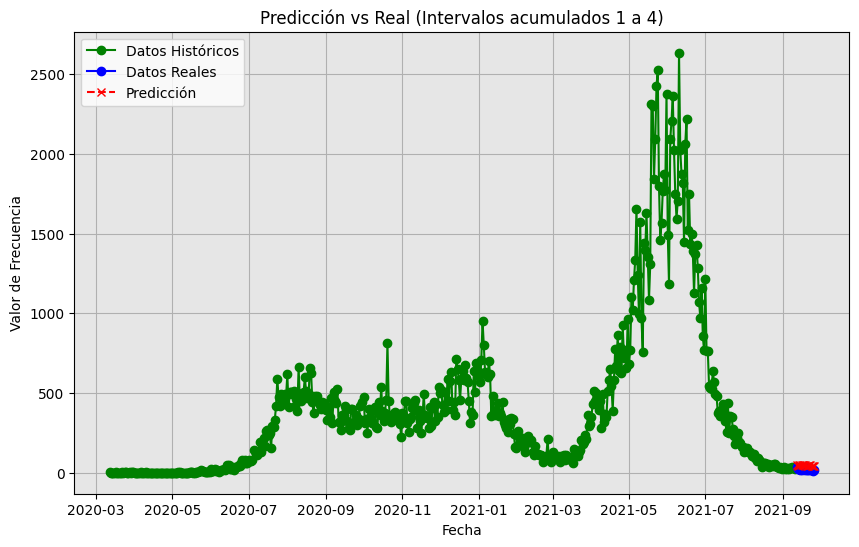

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 5: MAE = 71.05, MSE = 10091.89


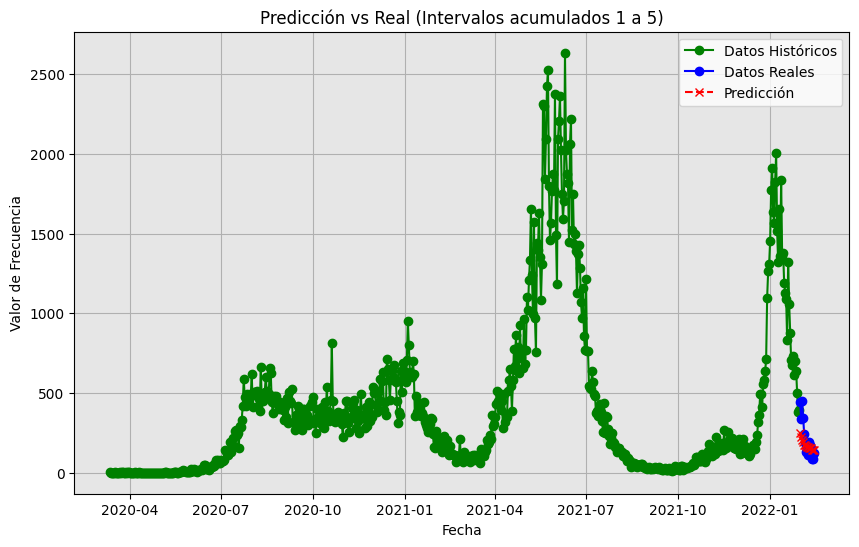

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 6: MAE = 147.89, MSE = 22724.88


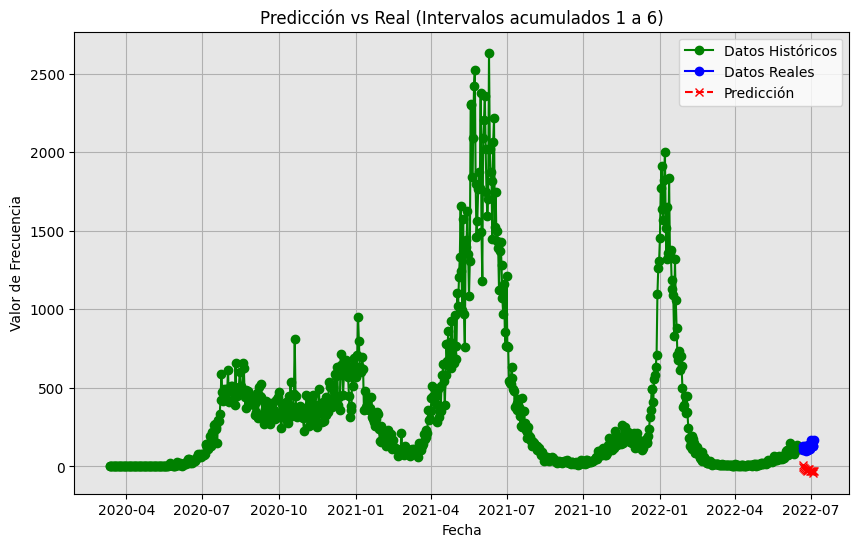

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 7: MAE = 333.50, MSE = 145953.74


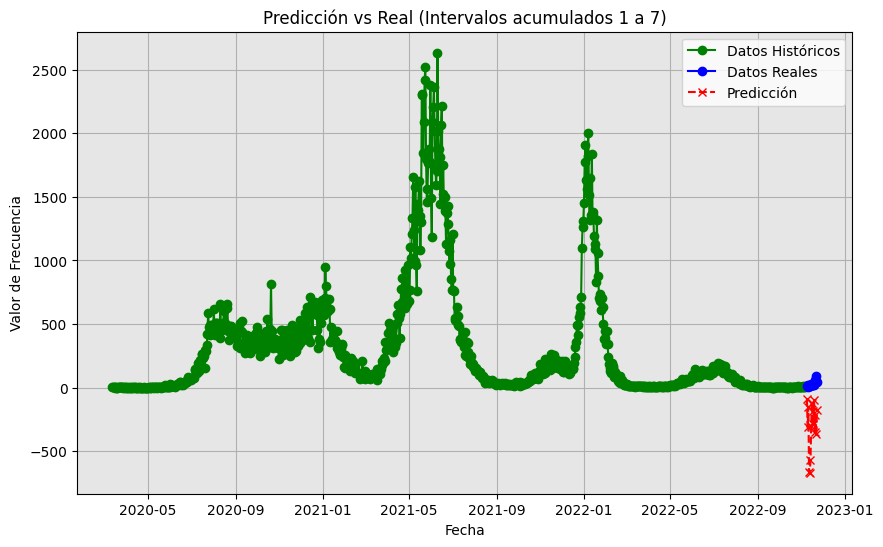

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 8: MAE = 42.47, MSE = 1823.03


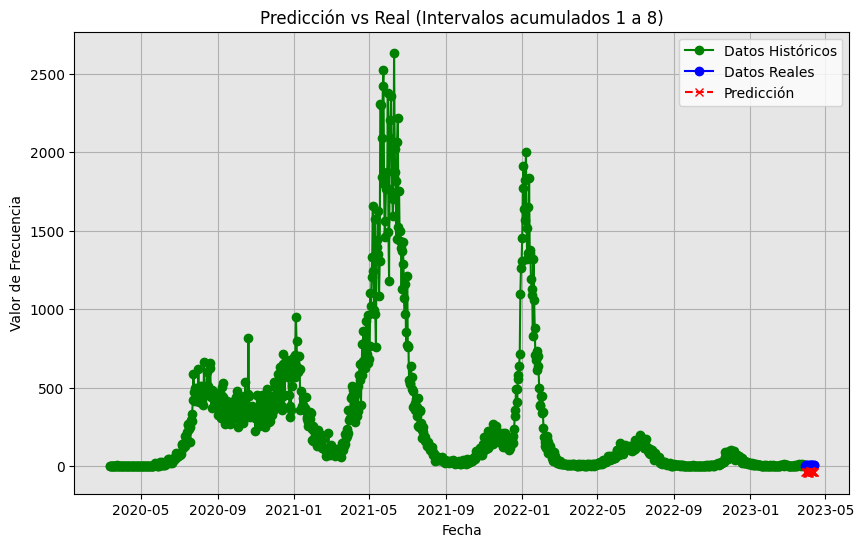


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  161.829240   39464.276278   49.960816
1      Intervalos 1 a 2  182.364549   49539.469451   41.527691
2      Intervalos 1 a 3  325.834245  181618.791114   36.126297
3      Intervalos 1 a 4   24.566073     638.379174   74.469446
4      Intervalos 1 a 5   71.046911   10091.892127   31.861175
5      Intervalos 1 a 6  147.889046   22724.882879  198.587984
6      Intervalos 1 a 7  333.495543  145953.743970  200.000000
7      Intervalos 1 a 8   42.473472    1823.031724  200.000000


In [41]:
# Parameters
HORIZONTE = 15 # falta el 30


resultados = []

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=32,
        horizon_len=HORIZONTE,
        num_layers=50
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        version='torch',
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]

    df_final = df[df['Intervalo'].isin(intervalos_incluir)]
    
    series = df_final['Frecuencia'].values.reshape(-1, 1)

    # Inicializamos el escalador y escalamos la serie
    scaler = MinMaxScaler(feature_range=(0, 1))
    series_scaled = scaler.fit_transform(series)

    # Convertimos la serie escalada en un DataFrame
    df_scaled = pd.DataFrame(series_scaled, columns=['Frecuencia'])

    # Concatenamos la columna 'Fecha' con la columna escalada
    df_concatenado = pd.concat([df_final[['Fecha']].reset_index(drop=True), df_scaled], axis=1)

    df_train = df_concatenado.iloc[:-HORIZONTE].copy()
    df_test = df_concatenado.iloc[-HORIZONTE:].copy()

    # df_train = df_final.iloc[:-HORIZONTE].copy()
    # df_test = df_final.iloc[-HORIZONTE:].copy()

    # Preparing the data for training

    data_hist = df_train[['Fecha', 'Frecuencia']].rename(columns={
        'Fecha': 'ds',
        'Frecuencia': 'sales'
    })
    data_hist["unique_id"] = "series_1"

    forecast_df = tfm.forecast_on_df(
        inputs=data_hist,
        freq='D',
        forecast_context_len= len(data_hist),
        value_name='sales',
        num_jobs=-1)
    
    # 6. Alinear fechas y calcular métricas

    y_true = df_test['Frecuencia']
    y_pred = forecast_df['timesfm']
    
    y_pred = scaler.inverse_transform(y_pred.values.reshape(-1, 1))
    y_true = scaler.inverse_transform(y_true.values.reshape(-1, 1))


    # Calculamos las métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    smape_value = smape(y_true, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos históricos, datos reales (test) y predicción sobre el intervalo completo
    fig, ax = plt.subplots(figsize=(10, 6))
    # Cambiar el color de fondo del eje a un gris suave
    ax.set_facecolor('#e6e6e6')  # Puedes ajustar el código hexadecimal para obtener el gris deseado

    # Graficar datos históricos (entrenamiento)
    # Aquí se vuelven a invertir las escalas para graficar los valores reales
    historico = scaler.inverse_transform(df_train['Frecuencia'].values.reshape(-1, 1))
    ax.plot(df_train['Fecha'], historico, label="Datos Históricos", marker='o', color='green')

    # Graficar datos reales del test (último intervalo)
    ax.plot(df_test['Fecha'], y_true, label="Datos Reales", marker='o', color='blue')

    # Graficar la predicción
    ax.plot(df_test['Fecha'], y_pred, label="Predicción", marker='x', linestyle='--', color='red')

    # Etiquetas y detalles de la gráfica
    ax.set_title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor de Frecuencia")
    ax.legend()
    ax.grid(True)

    plt.show()



df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 
df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/timesfm_15.csv', index=False)


Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 1: MAE = 198.98, MSE = 63915.79


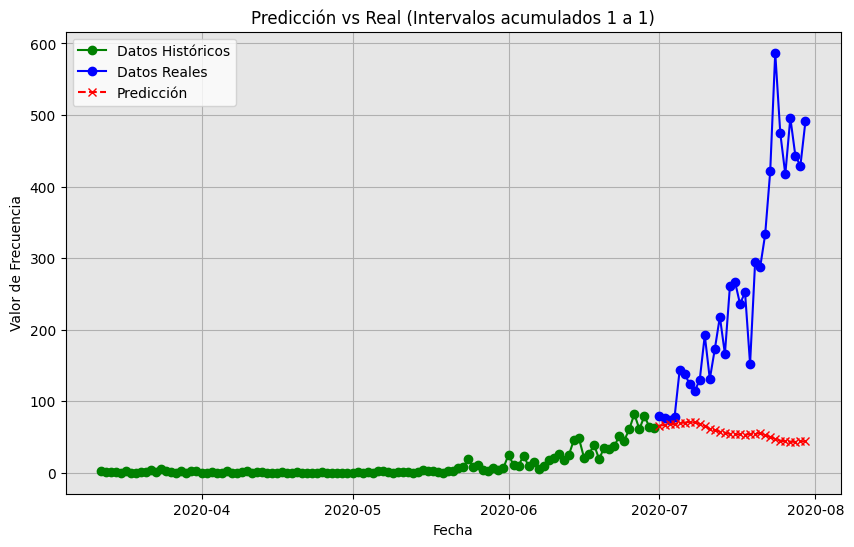

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 2: MAE = 187.61, MSE = 54042.86


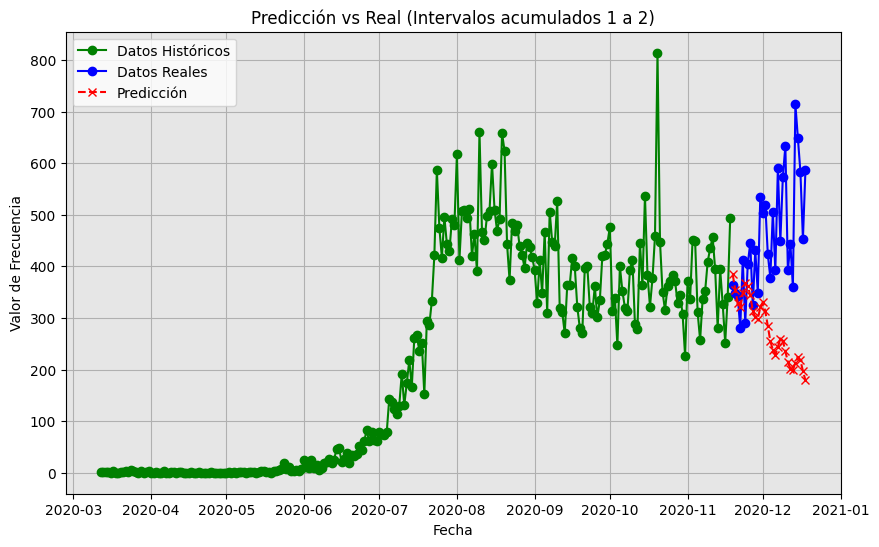

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 3: MAE = 316.34, MSE = 172432.14


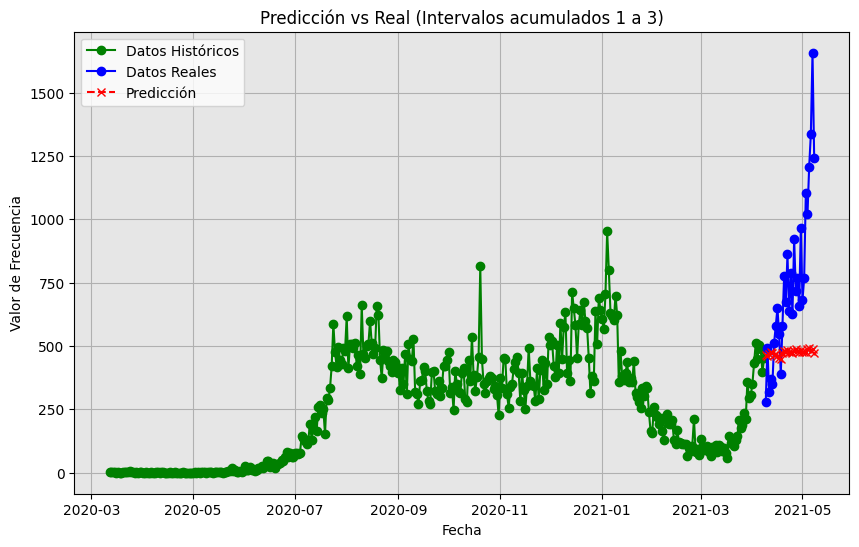

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 4: MAE = 41.80, MSE = 2038.77


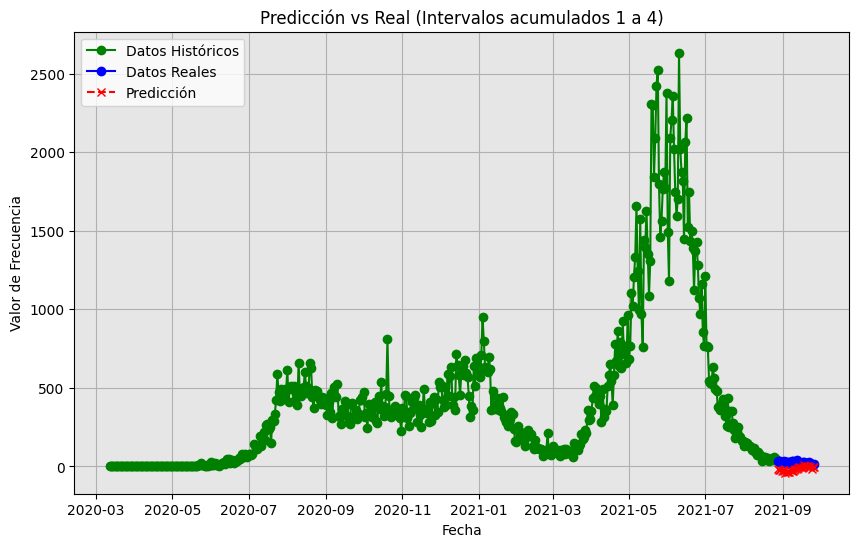

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 5: MAE = 385.63, MSE = 165428.20


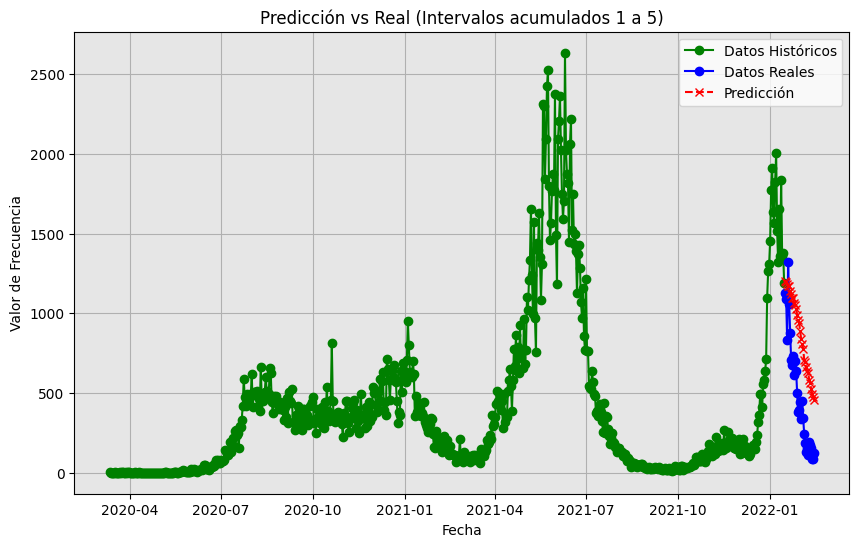

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 6: MAE = 151.10, MSE = 23289.37


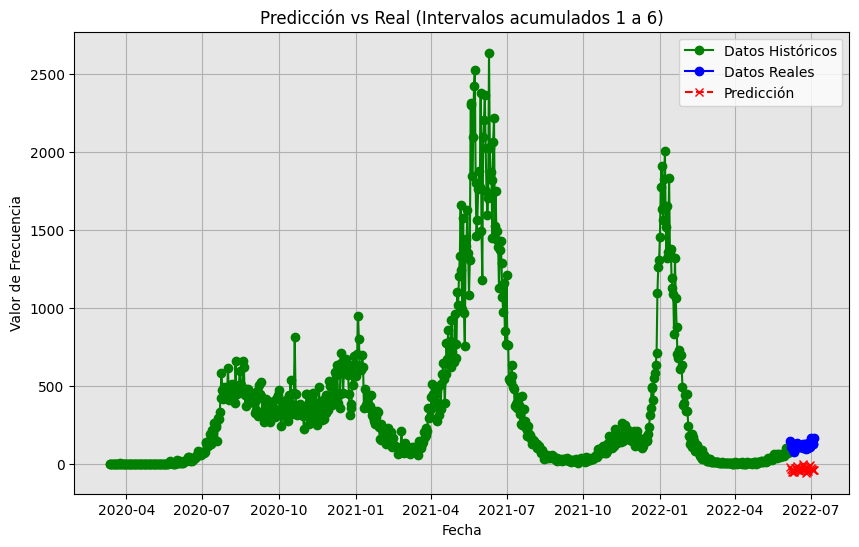

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 7: MAE = 416.36, MSE = 263496.67


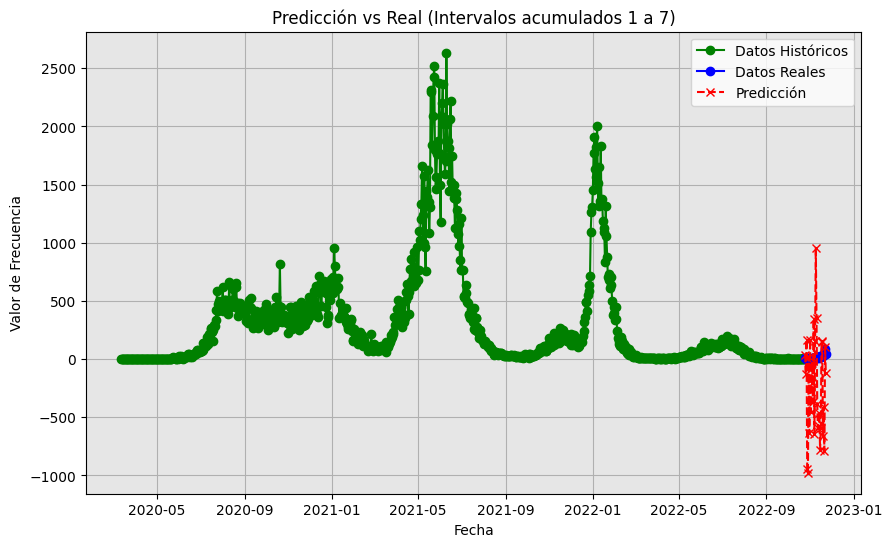

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
Acumulando intervalos 1 a 8: MAE = 61.51, MSE = 3840.70


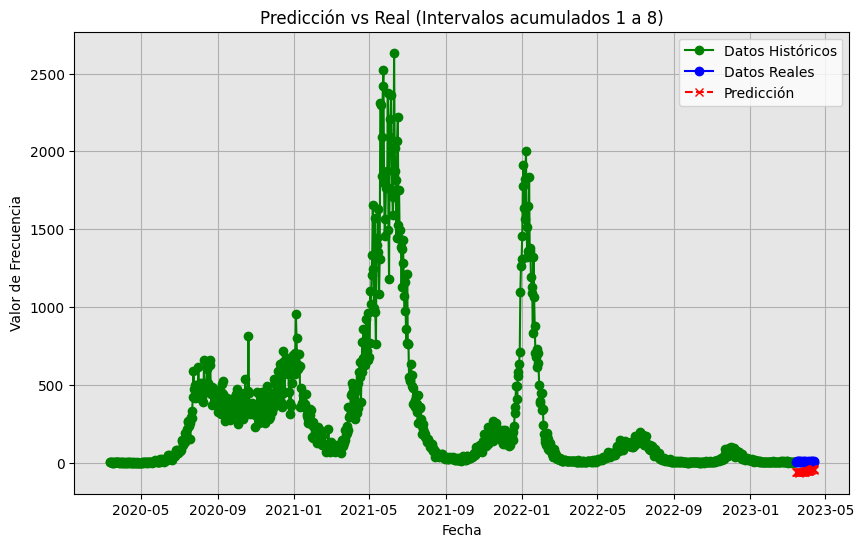


Resumen de métricas:
  Intervalos Acumulados         MAE            MSE       SMAPE
0      Intervalos 1 a 1  198.982635   63915.790876  106.295114
1      Intervalos 1 a 2  187.611755   54042.863092   49.261507
2      Intervalos 1 a 3  316.336490  172432.138545   45.571056
3      Intervalos 1 a 4   41.801022    2038.773090  194.287409
4      Intervalos 1 a 5  385.632291  165428.200357   73.704114
5      Intervalos 1 a 6  151.101156   23289.372383  199.846611
6      Intervalos 1 a 7  416.363839  263496.665838  182.115716
7      Intervalos 1 a 8   61.508628    3840.695782  200.000000


In [42]:
# Parameters
HORIZONTE = 30


resultados = []

intervalos_ordenados = create_intervals(df)

resultados = []

# Inicializamos el escalador (se ajustará en cada iteración)
scaler = MinMaxScaler(feature_range=(0, 1))

tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=32,
        horizon_len=HORIZONTE,
        num_layers=50
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        version='torch',
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
)

# Bucle incremental para cada acumulación de intervalos
for i in range(len(intervalos_ordenados)):
   
    # Intervalos acumulados
    intervalos_incluir = intervalos_ordenados[:i+1]

    df_final = df[df['Intervalo'].isin(intervalos_incluir)]
    
    series = df_final['Frecuencia'].values.reshape(-1, 1)

    # Inicializamos el escalador y escalamos la serie
    scaler = MinMaxScaler(feature_range=(0, 1))
    series_scaled = scaler.fit_transform(series)

    # Convertimos la serie escalada en un DataFrame
    df_scaled = pd.DataFrame(series_scaled, columns=['Frecuencia'])

    # Concatenamos la columna 'Fecha' con la columna escalada
    df_concatenado = pd.concat([df_final[['Fecha']].reset_index(drop=True), df_scaled], axis=1)

    df_train = df_concatenado.iloc[:-HORIZONTE].copy()
    df_test = df_concatenado.iloc[-HORIZONTE:].copy()

    # df_train = df_final.iloc[:-HORIZONTE].copy()
    # df_test = df_final.iloc[-HORIZONTE:].copy()

    # Preparing the data for training

    data_hist = df_train[['Fecha', 'Frecuencia']].rename(columns={
        'Fecha': 'ds',
        'Frecuencia': 'sales'
    })
    data_hist["unique_id"] = "series_1"

    forecast_df = tfm.forecast_on_df(
        inputs=data_hist,
        freq='D',
        forecast_context_len= len(data_hist),
        value_name='sales',
        num_jobs=-1)
    
    # 6. Alinear fechas y calcular métricas

    y_true = df_test['Frecuencia']
    y_pred = forecast_df['timesfm']
    
    y_pred = scaler.inverse_transform(y_pred.values.reshape(-1, 1))
    y_true = scaler.inverse_transform(y_true.values.reshape(-1, 1))


    # Calculamos las métricas
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    smape_value = smape(y_true, y_pred)

    resultados.append({
        'Intervalos Acumulados': f"Intervalos 1 a {i+1}",
        'MAE': mae,
        'MSE': mse,
        'SMAPE': smape_value
    })
    
    print(f"Acumulando intervalos 1 a {i+1}: MAE = {mae:.2f}, MSE = {mse:.2f}")
    
    # Graficar datos históricos, datos reales (test) y predicción sobre el intervalo completo
    fig, ax = plt.subplots(figsize=(10, 6))
    # Cambiar el color de fondo del eje a un gris suave
    ax.set_facecolor('#e6e6e6')  # Puedes ajustar el código hexadecimal para obtener el gris deseado

    # Graficar datos históricos (entrenamiento)
    # Aquí se vuelven a invertir las escalas para graficar los valores reales
    historico = scaler.inverse_transform(df_train['Frecuencia'].values.reshape(-1, 1))
    ax.plot(df_train['Fecha'], historico, label="Datos Históricos", marker='o', color='green')

    # Graficar datos reales del test (último intervalo)
    ax.plot(df_test['Fecha'], y_true, label="Datos Reales", marker='o', color='blue')

    # Graficar la predicción
    ax.plot(df_test['Fecha'], y_pred, label="Predicción", marker='x', linestyle='--', color='red')

    # Etiquetas y detalles de la gráfica
    ax.set_title(f"Predicción vs Real (Intervalos acumulados 1 a {i+1})")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor de Frecuencia")
    ax.legend()
    ax.grid(True)

    plt.show()



df_resultados = pd.DataFrame(resultados)
print("\nResumen de métricas:")
print(df_resultados) 

df_resultados.to_csv('C:/Users/criju/Documents/Codigos Tesis/resultados/timesfm_30.csv', index=False)